# Stock Market Trend Analysis For Top Companies

In [3]:
#Import Libraries for Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pandas_datareader as pdr
import yfinance as yfin
import warnings

In [4]:
#ignore unimportand warnings
warnings.filterwarnings('ignore')

In [5]:
#Gathering Data from Yahoo Finance
tickers = ['AAPL', 'MSFT', 'AMZN', 'META', 'GOOG']


df_stocks = yfin.download(tickers, start="2014-01-01", end="2024-01-01", interval = '1mo')


[*********************100%***********************]  5 of 5 completed


## Initial Data Modification for Analysis

In [6]:
#See All Data
pd.options.display.max_columns = None
df_stocks.head()

Price                      Adj Close                                   \
Ticker                          AAPL       AMZN       GOOG       META   
Date                                                                    
2014-01-01 00:00:00+00:00  15.597579  17.934500  29.308689  62.331894   
2014-02-01 00:00:00+00:00  16.396463  18.105000  30.169359  68.199486   
2014-03-01 00:00:00+00:00  16.823723  16.818501  27.672819  60.010765   
2014-04-01 00:00:00+00:00  18.495949  15.206500  26.166882  59.552513   
2014-05-01 00:00:00+00:00  19.840929  15.627500  27.817902  63.059113   

Price                                     Close                        \
Ticker                          MSFT       AAPL       AMZN       GOOG   
Date                                                                    
2014-01-01 00:00:00+00:00  31.690210  17.878571  17.934500  29.414000   
2014-02-01 00:00:00+00:00  32.083839  18.794287  18.105000  30.277761   
2014-03-01 00:00:00+00:00  34.585693  19.169287  16.818501  27.772251   
2014-04-01 00:00:00+00:00  34.087894  21.074642  15.206500  26.260900   
2014-05-01 00:00:00+00:00  34.543499  22.607143  15.627500  27.917852   

Price                                                 High             \
Ticker                          META       MSFT       AAPL       AMZN   
Date                                                                    
2014-01-01 00:00:00+00:00  62.570000  37.840000  20.007143  20.403000   
2014-02-01 00:00:00+00:00  68.459999  38.310001  19.685356  18.293501   
2014-03-01 00:00:00+00:00  60.240002  40.990002  19.607143  19.155500   
2014-04-01 00:00:00+00:00  59.779999  40.400002  21.408215  17.415001   
2014-05-01 00:00:00+00:00  63.299999  40.939999  23.006071  15.743500   

Price                                                             Low  \
Ticker                          GOOG       META       MSFT       AAPL   
Date                                                                    
2014-01-01 00:00:00+00:00  29.552729  63.369999  37.889999  17.626785   
2014-02-01 00:00:00+00:00  30.607277  71.440002  38.459999  17.832144   
2014-03-01 00:00:00+00:00  30.560204  72.589996  41.500000  18.671785   
2014-04-01 00:00:00+00:00  30.158699  63.910000  41.660000  18.261786   
2014-05-01 00:00:00+00:00  28.314262  64.300003  40.970001  20.726070   

Price                                                                  \
Ticker                          AMZN       GOOG       META       MSFT   
Date                                                                    
2014-01-01 00:00:00+00:00  17.888000  26.955713  51.849998  34.630001   
2014-02-01 00:00:00+00:00  16.886499  28.095192  60.700001  35.689999   
2014-03-01 00:00:00+00:00  16.544001  27.570307  57.980000  37.490002   
2014-04-01 00:00:00+00:00  14.400000  25.071167  54.660000  38.900002   
2014-05-01 00:00:00+00:00  14.219000  25.096100  56.259998  38.509998   

Price                           Open                                   \
Ticker                          AAPL       AMZN       GOOG       META   
Date                                                                    
2014-01-01 00:00:00+00:00  19.845715  19.940001  27.782366  54.830002   
2014-02-01 00:00:00+00:00  17.950357  17.948999  29.369913  63.029999   
2014-03-01 00:00:00+00:00  18.693571  17.937000  30.056091  66.959999   
2014-04-01 00:00:00+00:00  19.205713  16.904499  27.859013  60.459999   
2014-05-01 00:00:00+00:00  21.142857  15.206500  26.283339  60.430000   

Price                                     Volume                          \
Ticker                          MSFT        AAPL        AMZN        GOOG   
Date                                                                       
2014-01-01 00:00:00+00:00  37.349998  8765954400  1620238000  2188640930   
2014-02-01 00:00:00+00:00  37.740002  5880366800  1660180000  1627931099   
2014-03-01 00:00:00+00:00  37.919998  5001698800  1505070000  1431962004   
2014-04-01 00:00:00+00:00  41.1500

In [11]:
adj_close = df_stocks['Adj Close']


In [12]:
#Formatting Time
date = df_stocks.index
date = pd.to_datetime(df_stocks.index)
date = date.strftime('%Y-%m-%d')
date

Index(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01',
       '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
       ...
       '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01',
       '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01'],
      dtype='object', name='Date', length=120)

In [13]:
#SUMMURY STATISCS OF ADJESTED CLOSE VALUE

adj_close.describe()

Ticker,AAPL,AMZN,GOOG,META,MSFT
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,76.222668,84.741658,68.909614,178.479388,145.403074
std,57.285042,51.258301,37.188667,81.731562,103.455622
min,15.597579,15.206500,25.932322,59.552513,31.690210
25%,27.162046,37.155000,37.797691,116.502476,50.397463
50%,45.336552,86.366001,56.863930,169.412849,105.516151
75%,130.902454,126.857498,99.906027,222.193726,237.911392
max,194.971771,175.353500,147.739670,377.936310,376.087067


In [14]:
#Create Categories Using Daily Percentage Change
def categorize_data(x):
    if -0.5 < x < 0.5:
        return 'No Change'
    elif 0.5 < x <= 3:
        return 'Positive'
    elif -3 < x <= -0.5:
        return 'Negative'
    elif 3 < x <= 6:
        return 'Top Gainer'
    elif -6 < x <= -3:
        return 'Top Loser'
    elif x > 6:
        return 'Bullish'
    elif x < -6:
        return 'Bearish'

## APPLE(AAPL) Stock Market Analysis

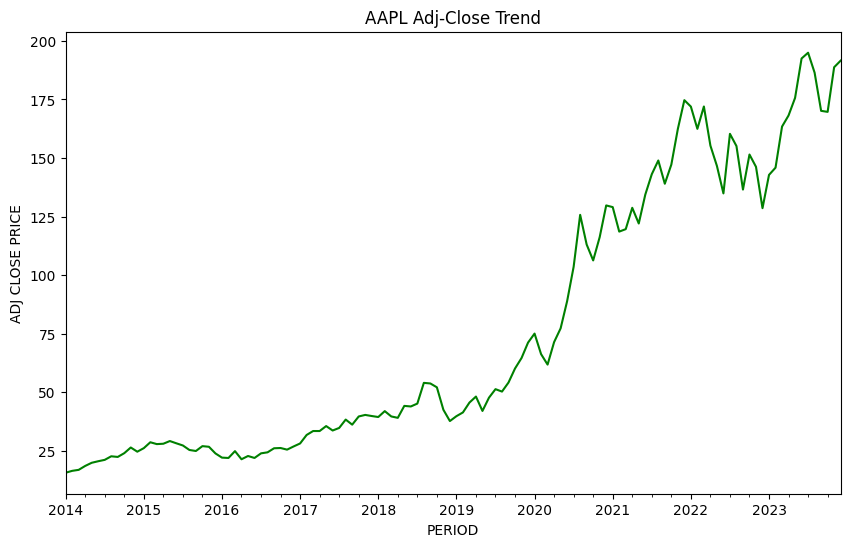

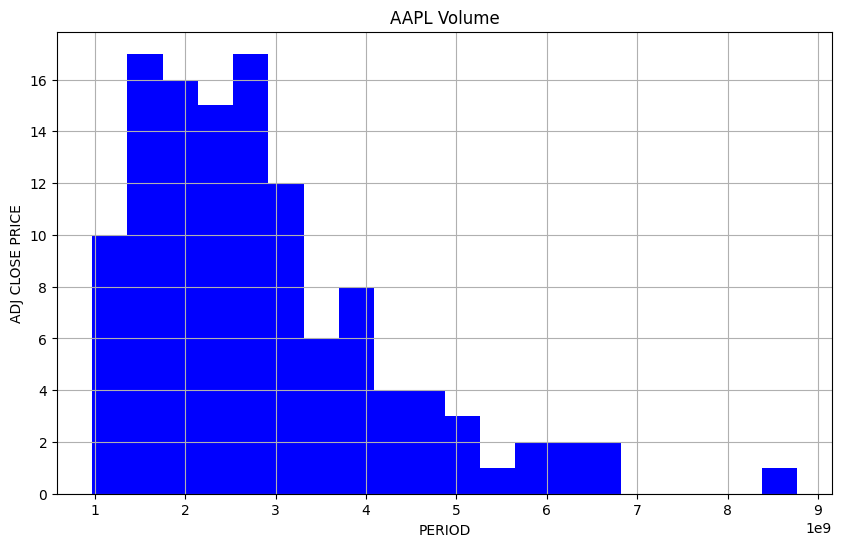

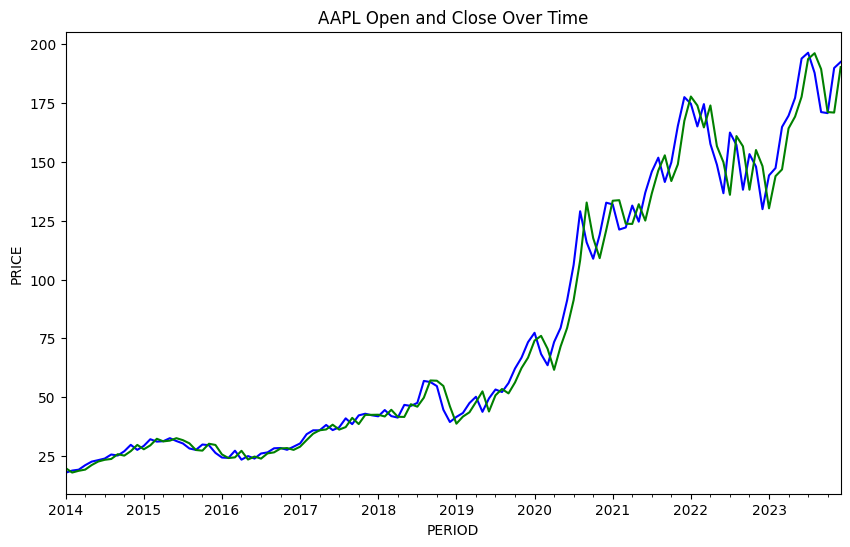

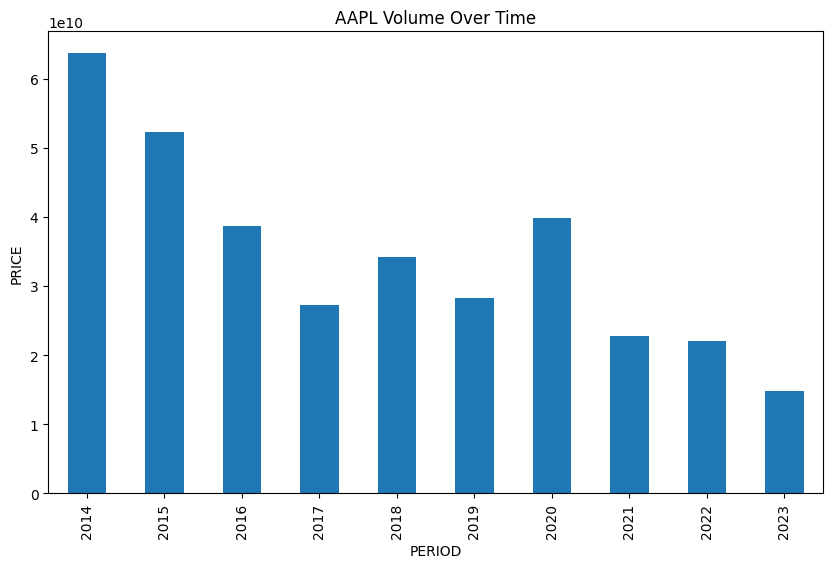

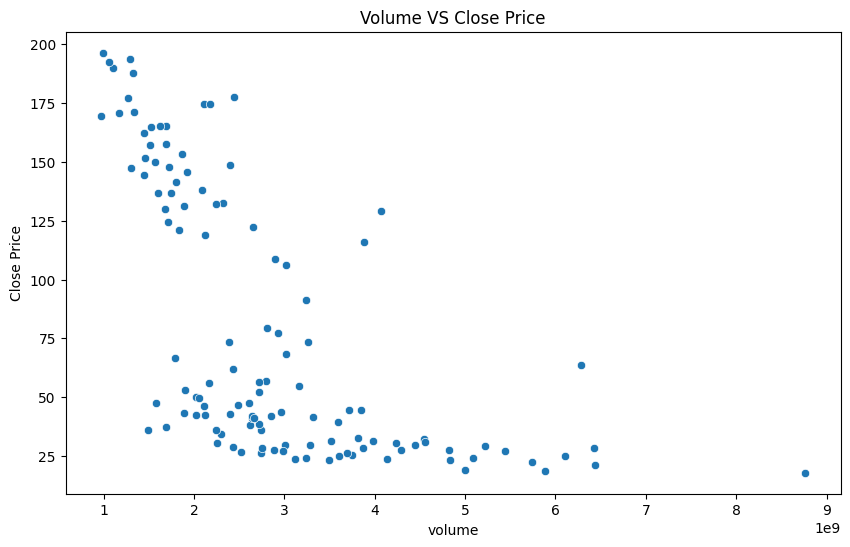

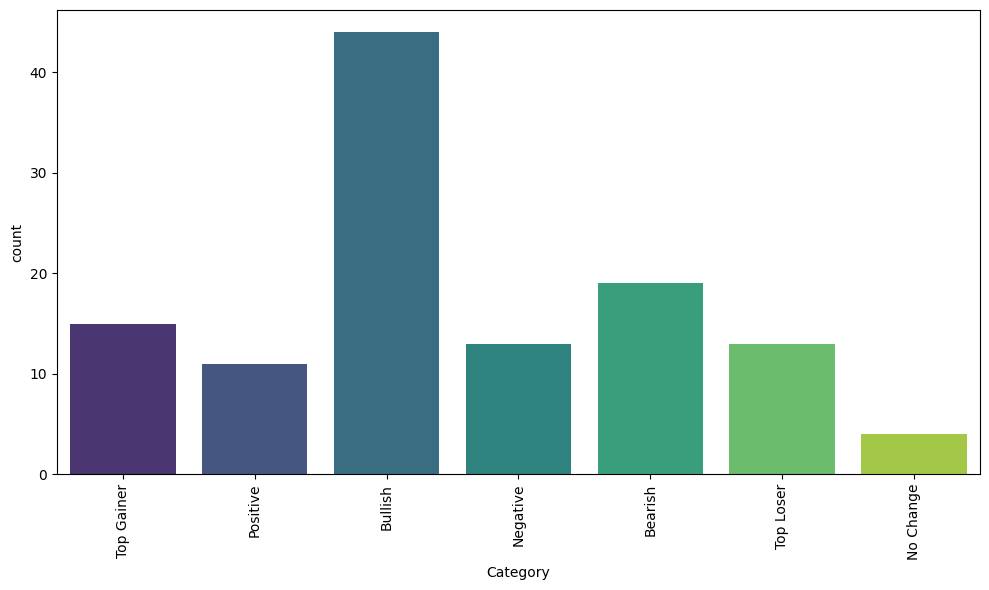

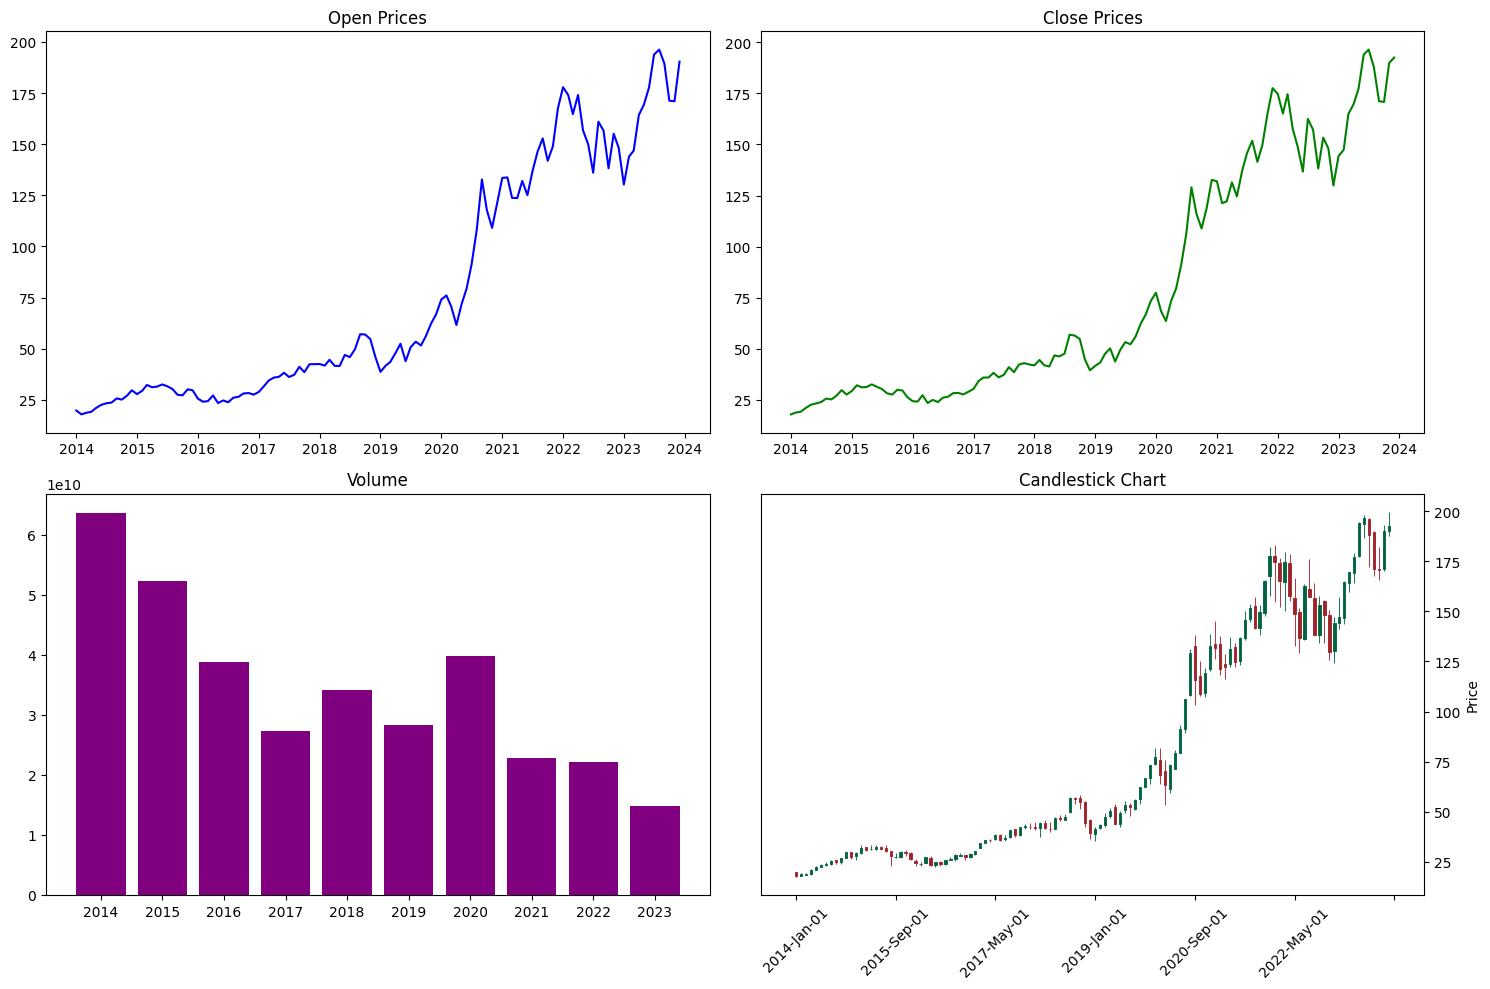

In [17]:
#Get ADJ Close Data
AAPL_adj_close =adj_close['AAPL']

#Find the Percentage Change Between Previous Data and Current Data
AAPL_adj_close['daily_perc_change'] = AAPL_adj_close.pct_change()*100 
AAPL_adj_close['daily_perc_change'].dropna(axis=0,inplace=True)

AAPL_adj_close['daily_perc_change'] = pd.to_numeric(AAPL_adj_close['daily_perc_change'], errors='coerce')
AAPL_adj_close['daily_perc_change'] = AAPL_adj_close['daily_perc_change'].fillna(0) 

#Set Data One by One from Categories
AAPL_adj_clos =df_stocks['Adj Close','AAPL']
AAPL_open =df_stocks['Open','AAPL']
AAPL_close =df_stocks['Close','AAPL']
AAPL_high =df_stocks['High','AAPL']
AAPL_low =df_stocks['Low','AAPL']
AAPL_volume =df_stocks['Volume','AAPL']
AAPL_percentage = AAPL_adj_close['daily_perc_change']

#Create New DataFrame and Paste the Data
df_AAPL = pd.DataFrame()
df_AAPL ['adj_close']= AAPL_adj_close
df_AAPL ['open']= AAPL_open
df_AAPL ['close']= AAPL_close
df_AAPL ['high']= AAPL_high
df_AAPL ['low']= AAPL_low
df_AAPL ['volume']= AAPL_volume
df_AAPL ['daily_perc_change']=AAPL_percentage



#Drop Unnecessary Data
df_AAPL = df_AAPL.drop(df_AAPL.index[-1])
df_AAPL

#Create Year-Wise Data for Analysis
df_AAPL.index = pd.to_datetime(df_AAPL.index)
df_year = df_AAPL.resample("Y").sum()
df_year.index = df_year.index.strftime("%Y")  



# Ensure to apply 'daily_perc_change'
AAPL_adj_close['Change Type'] = AAPL_adj_close['daily_perc_change'].apply(categorize_data)

AAPL_categarize=AAPL_adj_close['Change Type'] 
df_AAPL['categarize']=AAPL_categarize
df_AAPL

#Create a line plot to visualize the trend of the adjusted closing price.
plt.figure(figsize=(10,6))
df_AAPL['adj_close'].plot(color='green')
plt.title('AAPL Adj-Close Trend')
plt.ylabel('ADJ CLOSE PRICE')
plt.xlabel('PERIOD')

#Create a histogram to visualize the volume density over the period.
plt.figure(figsize=(10,6))
df_AAPL['volume'].hist(bins=20,color='blue')
plt.title('AAPL Volume')
plt.ylabel('ADJ CLOSE PRICE')
plt.xlabel('PERIOD')


#Create a line plot to visualize the trend of the opening and closing prices.
plt.figure(figsize=(10,6))
df_AAPL['close'].plot(color='blue')
df_AAPL['open'].plot(color='green')
plt.title('AAPL Open and Close Over Time')
plt.ylabel('PRICE')
plt.xlabel('PERIOD')


#Create a bar plot to visualize the trading volume.
plt.figure(figsize=(10,6))
df_year['volume'].plot(kind="bar", legend=False,label='volume')
plt.title('AAPL Volume Over Time')
plt.ylabel('PRICE')
plt.xlabel('PERIOD')


#Create a scatter plot to compare the opening and closing prices
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_AAPL['volume'],y=df_AAPL['close'], palette='coolwarm')
plt.title('Volume VS Close Price')
plt.ylabel('Close Price')


#Create a counter plot to analyze trading terms, such as the top gainers and top losers
plt.figure(figsize=(10, 6))
sns.countplot(x='categarize', data=df_AAPL, palette='viridis')
plt.xlabel('Category')
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

#Create Dashboard to Understand Basic Data
# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Line plot of 'open' prices
axs[0, 0].plot(df_AAPL.index, df_AAPL['open'], color='blue')
axs[0, 0].set_title('Open Prices')

# Plot 2: Line plot of 'close' prices
axs[0, 1].plot(df_AAPL.index, df_AAPL['close'], color='green')
axs[0, 1].set_title('Close Prices')

# Plot 3: Bar plot of 'volume'
axs[1, 0].bar(df_year.index, df_year['volume'], color='purple')
axs[1, 0].set_title('Volume')

# Plot 4: Candlestick plot (requires mplfinance)
import mplfinance as mpf
ohlc = df_AAPL[['open', 'high', 'low', 'close']].copy()
mpf.plot(ohlc, type='candle', ax=axs[1, 1], style='charles')
axs[1, 1].set_title('Candlestick Chart')

# Adjust layout
plt.tight_layout()
plt.show()


In [20]:
df_AAPL

,adj_close,open,close,high,low,volume,daily_perc_change,categarize
Date,,,,,,,,
2014-01-01 00:00:00+00:00,15.597579,19.845715,17.878571,20.007143,17.626785,8.765954e+09,NaN,NaN
2014-02-01 00:00:00+00:00,16.396463,17.950357,18.794287,19.685356,17.832144,5.880367e+09,5.121849,Top Gainer
2014-03-01 00:00:00+00:00,16.823723,18.693571,19.169287,19.607143,18.671785,5.001699e+09,2.605802,Positive
2014-04-01 00:00:00+00:00,18.495949,19.205713,21.074642,21.408215,18.261786,6.435061e+09,9.939690,Bullish
2014-05-01 00:00:00+00:00,19.840929,21.142857,22.607143,23.006071,20.726070,5.735668e+09,7.271756,Bullish
...,...,...,...,...,...,...,...,...
2023-08-01 00:00:00+00:00,186.456329,196.240005,187.869995,196.729996,171.960007,1.322439e+09,-4.367526,Top Loser
2023-09-01 00:00:00+00:00,170.151184,189.490005,171.210007,189.979996,167.619995,1.337587e+09,-8.744753,Bearish
2023-10-01 00:00:00+00:00,169.713898,171.220001,170.770004,182.339996,165.669998,1.172720e+09,-0.256999,No Change


## META Stock Market Analysis

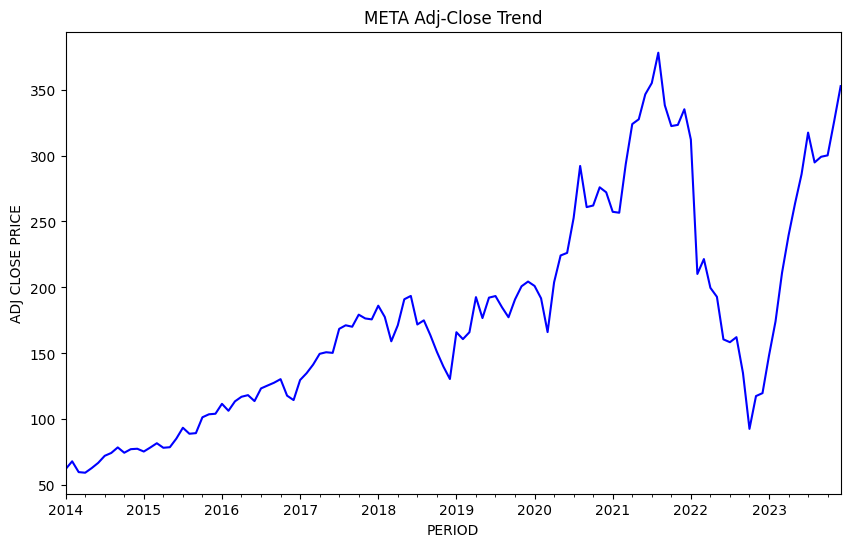

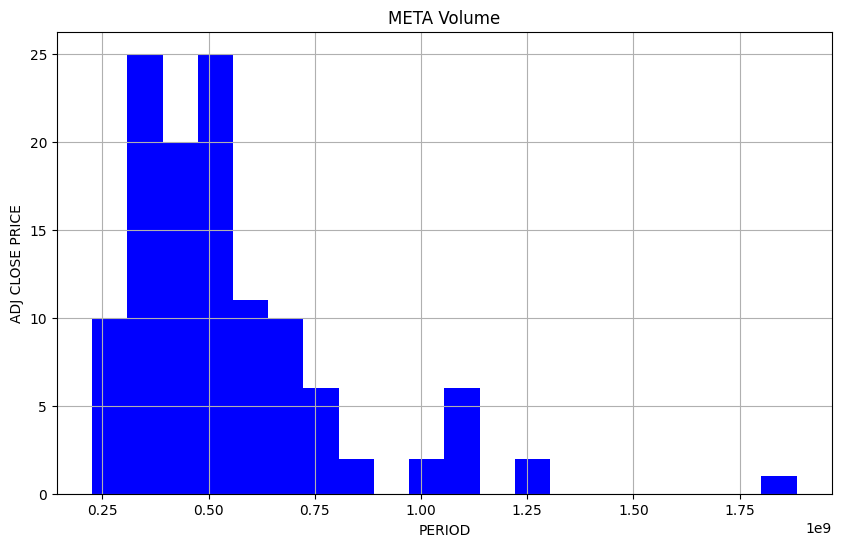

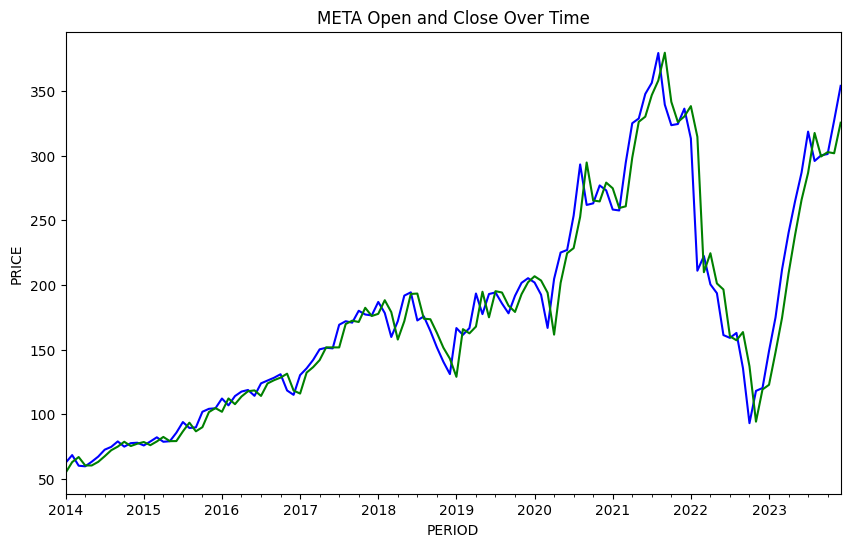

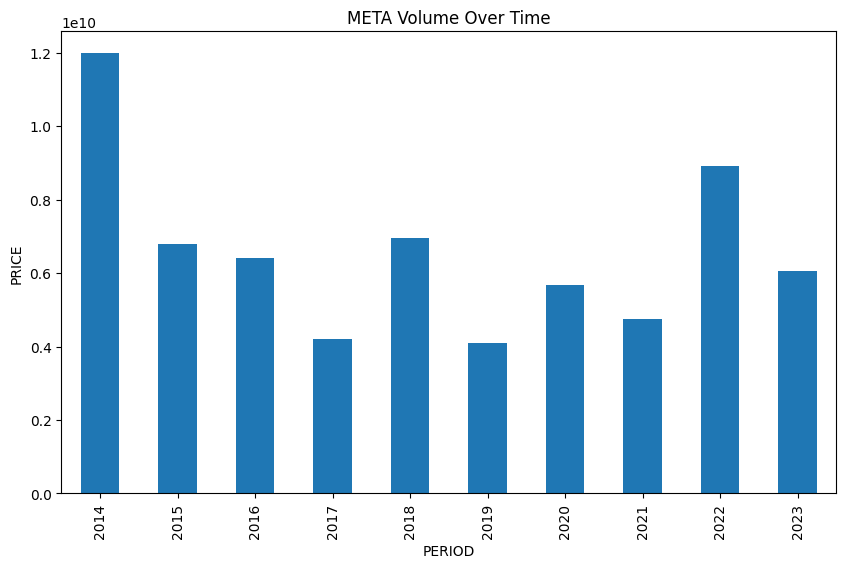

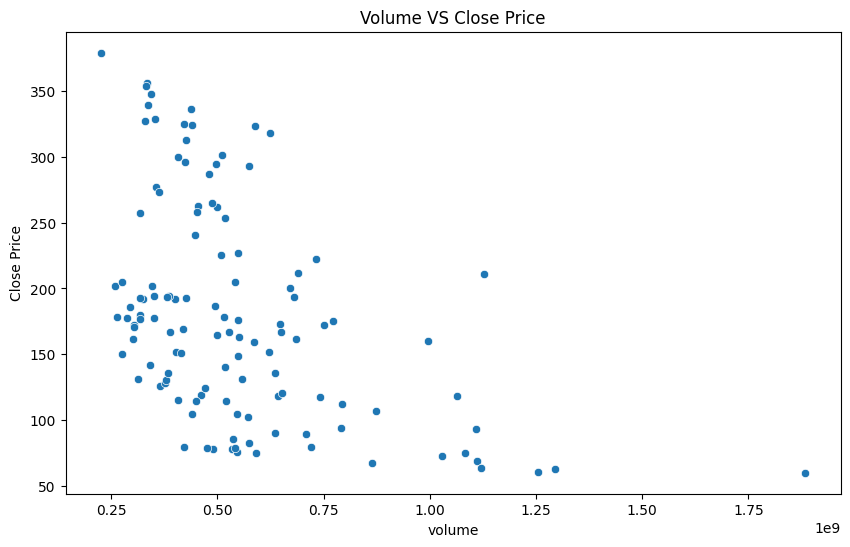

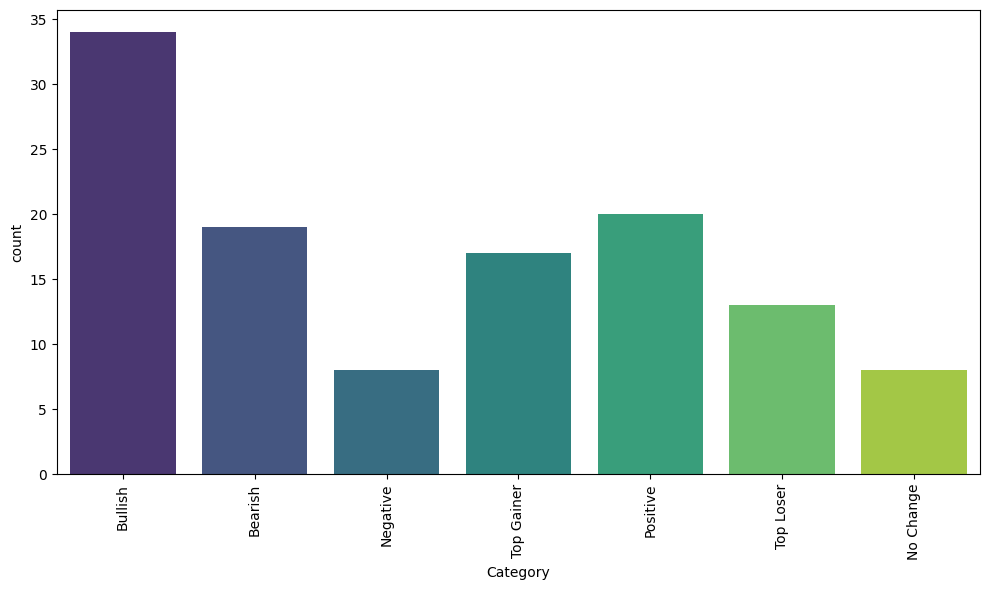

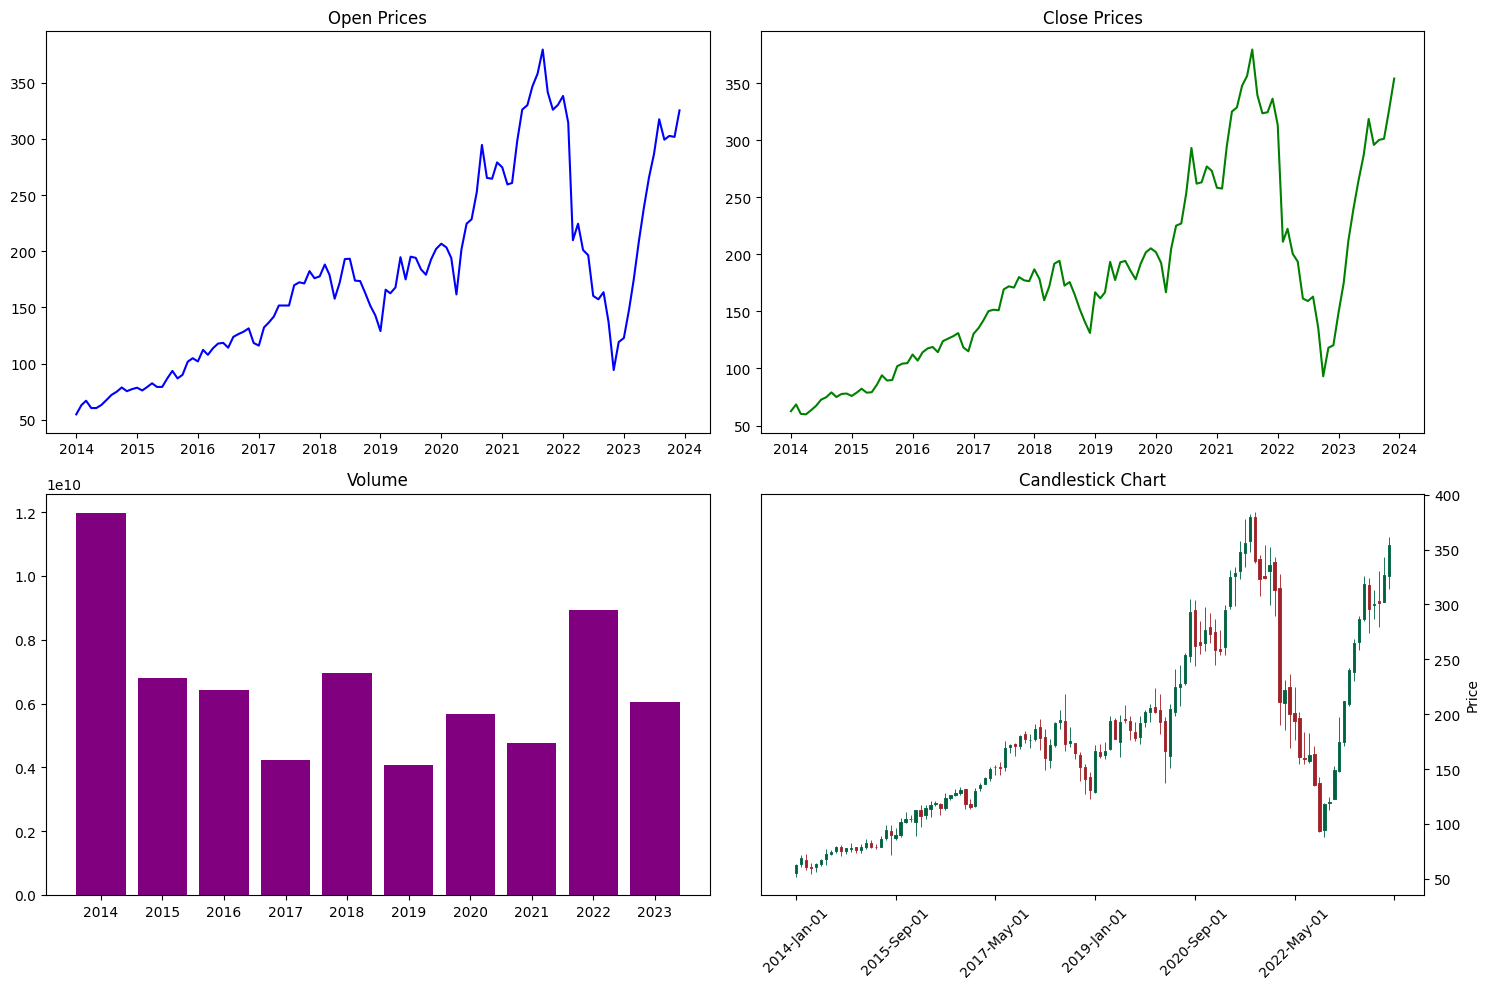

In [21]:
#Get ADJ Close Data
META_adj_close = adj_close['META']

#Find the Percentage Change Between Previous Data and Current Data
META_adj_close['daily_perc_change'] = META_adj_close.pct_change()*100 
META_adj_close['daily_perc_change'].dropna(axis=0,inplace=True)

META_adj_close['daily_perc_change'] = pd.to_numeric(META_adj_close['daily_perc_change'], errors='coerce')
META_adj_close['daily_perc_change'] = META_adj_close['daily_perc_change'].fillna(0) 

#Set Data One by One from Categories
META_adj_clos = df_stocks['Adj Close','META']
META_open = df_stocks['Open','META']
META_close = df_stocks['Close','META']
META_high = df_stocks['High','META']
META_low = df_stocks['Low','META']
META_volume = df_stocks['Volume','META']
META_percentage = META_adj_close['daily_perc_change']

#Create New DataFrame and Paste the Data
df_META = pd.DataFrame()
df_META ['adj_close'] = META_adj_close
df_META ['open'] = META_open
df_META ['close'] = META_close
df_META ['high'] = META_high
df_META ['low'] = META_low
df_META ['volume'] = META_volume
df_META ['daily_perc_change'] = META_percentage

#Drop Unnecessary Data
df_META = df_META.drop(df_META.index[-1])
df_META

#Create Year-Wise Data for Analysis
df_META.index = pd.to_datetime(df_META.index)
df_year = df_META.resample("Y").sum()
df_year.index = df_year.index.strftime("%Y")  


# Ensure to apply 'daily_perc_change'
META_adj_close['Change Type'] = META_adj_close['daily_perc_change'].apply(categorize_data)

META_categarize = META_adj_close['Change Type'] 
df_META['categarize'] = META_categarize
df_META

#Create a line plot to visualize the trend of the adjusted closing price.
plt.figure(figsize=(10,6))
df_META['adj_close'].plot(color='blue')
plt.title('META Adj-Close Trend')
plt.ylabel('ADJ CLOSE PRICE')
plt.xlabel('PERIOD')

#Create a histogram to visualize the volume density over the period.
plt.figure(figsize=(10,6))
df_META['volume'].hist(bins=20,color='blue')
plt.title('META Volume')
plt.ylabel('ADJ CLOSE PRICE')
plt.xlabel('PERIOD')

#Create a line plot to visualize the trend of the opening and closing prices.
plt.figure(figsize=(10,6))
df_META['close'].plot(color='blue')
df_META['open'].plot(color='green')
plt.title('META Open and Close Over Time')
plt.ylabel('PRICE')
plt.xlabel('PERIOD')

#Create a bar plot to visualize the trading volume.
plt.figure(figsize=(10,6))
df_year['volume'].plot(kind="bar", legend=False)
plt.title('META Volume Over Time')
plt.ylabel('PRICE')
plt.xlabel('PERIOD')

#Create a scatter plot to compare the opening and closing prices
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_META['volume'],y=df_META['close'], palette='coolwarm')
plt.title('Volume VS Close Price')
plt.ylabel('Close Price')

#Create a counter plot to analyze trading terms, such as the top gainers and top losers
plt.figure(figsize=(10, 6))
sns.countplot(x='categarize', data=df_META, palette='viridis')
plt.xlabel('Category')
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

#Create Dashboard to Understand Basic Data
# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Line plot of 'open' prices
axs[0, 0].plot(df_META.index, df_META['open'], color='blue')
axs[0, 0].set_title('Open Prices')

# Plot 2: Line plot of 'close' prices
axs[0, 1].plot(df_META.index, df_META['close'], color='green')
axs[0, 1].set_title('Close Prices')

# Plot 3: Bar plot of 'volume'
axs[1, 0].bar(df_year.index, df_year['volume'], color='purple')
axs[1, 0].set_title('Volume')

# Plot 4: Candlestick plot (requires mplfinance)
import mplfinance as mpf
ohlc = df_META[['open', 'high', 'low', 'close']].copy()
mpf.plot(ohlc, type='candle', ax=axs[1, 1], style='charles')
axs[1, 1].set_title('Candlestick Chart')

# Adjust layout
plt.tight_layout()
plt.show()


In [22]:
df_META

,adj_close,open,close,high,low,volume,daily_perc_change,categarize
Date,,,,,,,,
2014-01-01 00:00:00+00:00,62.331894,54.830002,62.570000,63.369999,51.849998,1.294715e+09,NaN,NaN
2014-02-01 00:00:00+00:00,68.199486,63.029999,68.459999,71.440002,60.700001,1.110774e+09,9.413466,Bullish
2014-03-01 00:00:00+00:00,60.010765,66.959999,60.240002,72.589996,57.980000,1.255440e+09,-12.007012,Bearish
2014-04-01 00:00:00+00:00,59.552513,60.459999,59.779999,63.910000,54.660000,1.883965e+09,-0.763616,Negative
2014-05-01 00:00:00+00:00,63.059113,60.430000,63.299999,64.300003,56.259998,1.120156e+09,5.888248,Top Gainer
...,...,...,...,...,...,...,...,...
2023-08-01 00:00:00+00:00,294.764038,317.540009,295.890015,324.140015,274.380005,4.231478e+08,-7.128065,Bearish
2023-09-01 00:00:00+00:00,299.067596,299.369995,300.209991,312.869995,286.790009,4.066866e+08,1.460001,Positive
2023-10-01 00:00:00+00:00,300.123566,302.739990,301.269989,330.540009,279.399994,5.113079e+08,0.353087,No Change


## AMAZON(AMZN) Stock Market Analysis

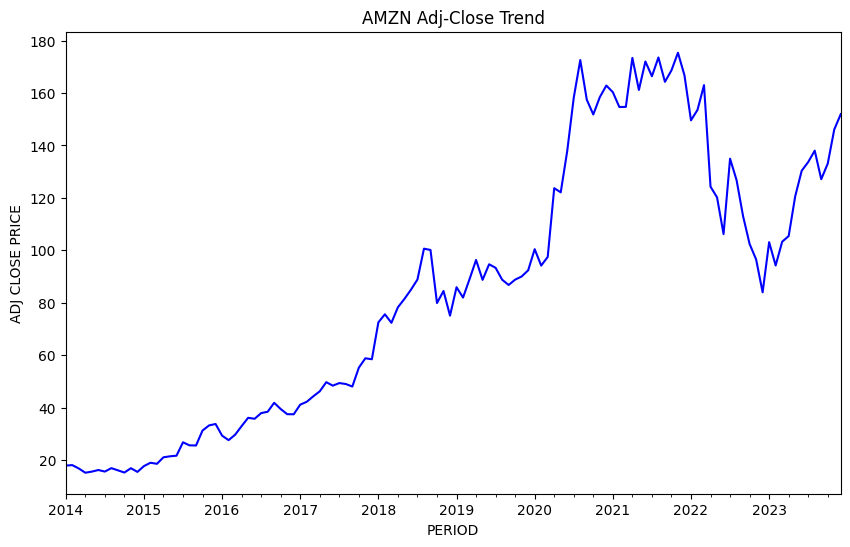

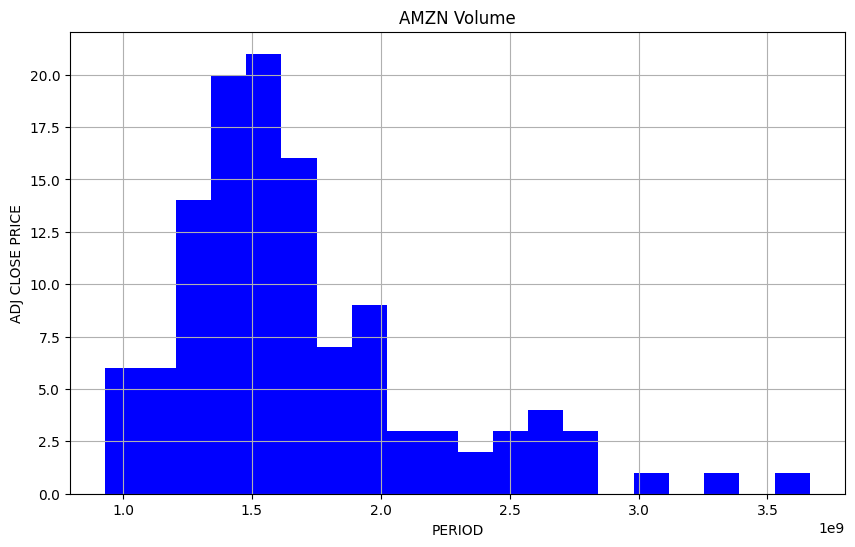

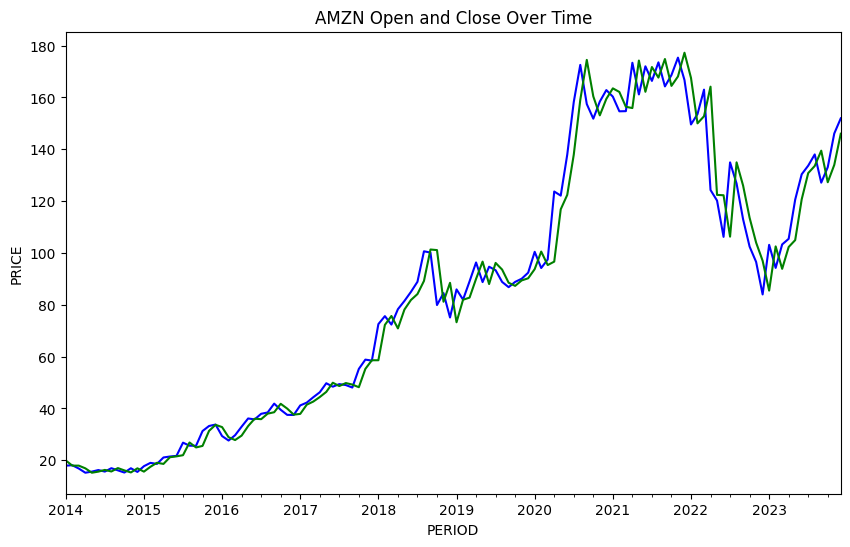

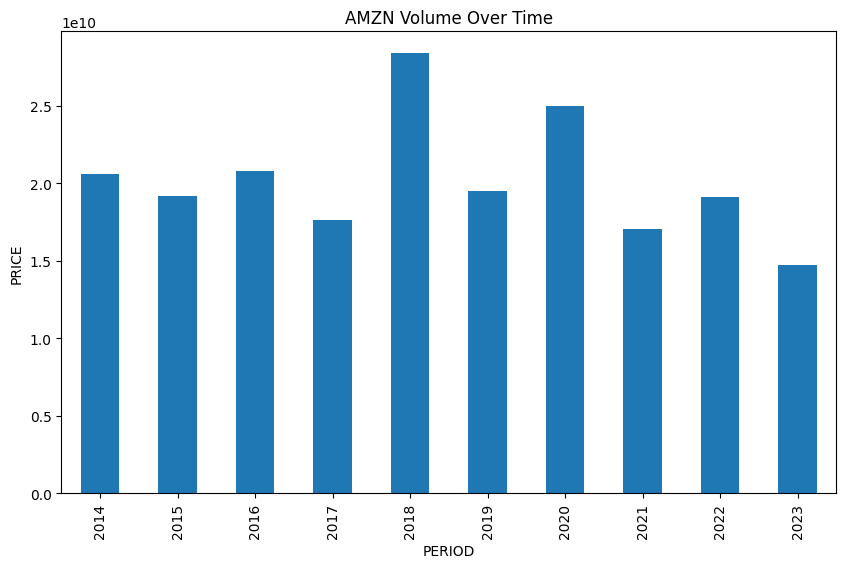

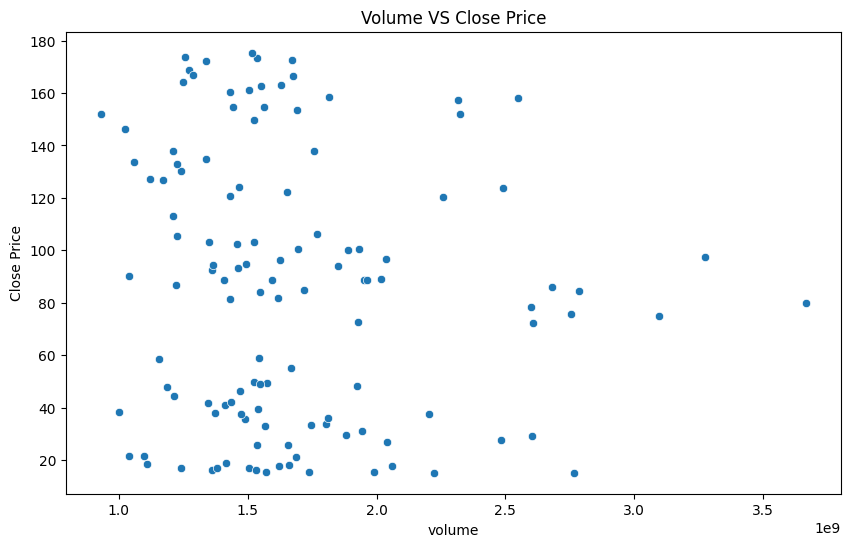

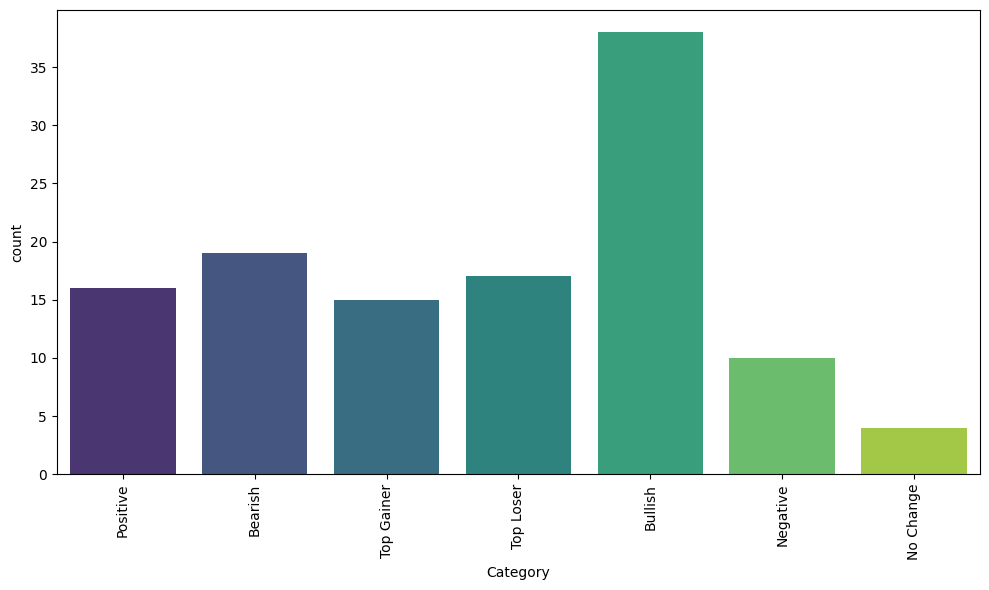

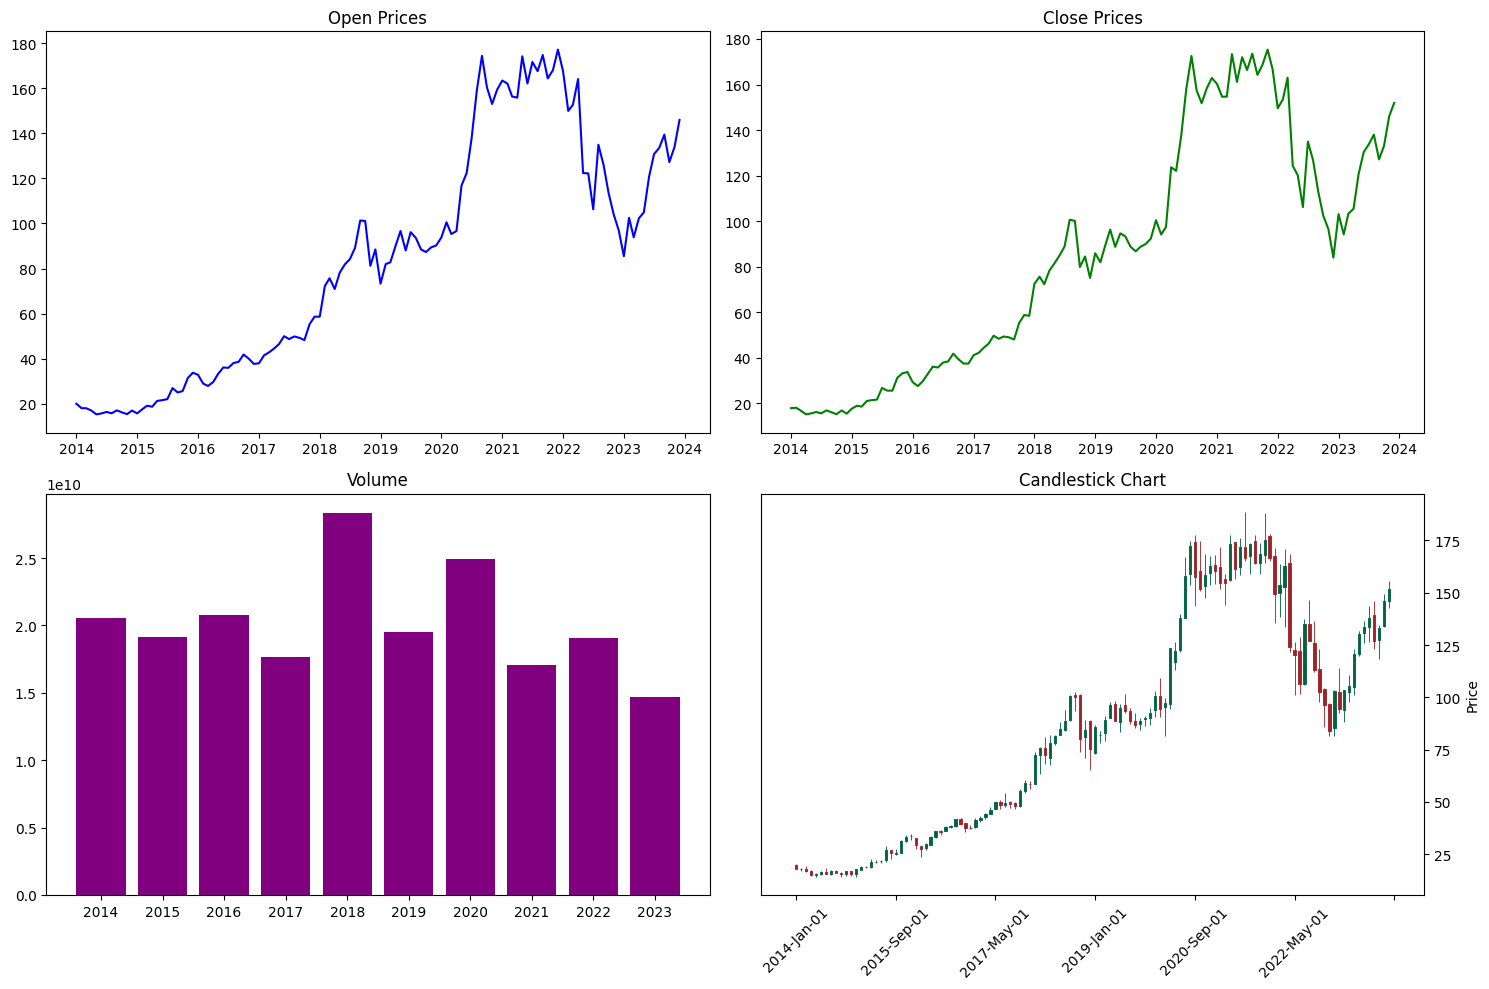

In [23]:
#Get ADJ Close Data
AMZN_adj_close = adj_close['AMZN']

#Find the Percentage Change Between Previous Data and Current Data
AMZN_adj_close['daily_perc_change'] = AMZN_adj_close.pct_change()*100 
AMZN_adj_close['daily_perc_change'].dropna(axis=0,inplace=True)

AMZN_adj_close['daily_perc_change'] = pd.to_numeric(AMZN_adj_close['daily_perc_change'], errors='coerce')
AMZN_adj_close['daily_perc_change'] = AMZN_adj_close['daily_perc_change'].fillna(0) 

#Set Data One by One from Categories
AMZN_adj_clos = df_stocks['Adj Close','AMZN']
AMZN_open = df_stocks['Open','AMZN']
AMZN_close = df_stocks['Close','AMZN']
AMZN_high = df_stocks['High','AMZN']
AMZN_low = df_stocks['Low','AMZN']
AMZN_volume = df_stocks['Volume','AMZN']
AMZN_percentage = AMZN_adj_close['daily_perc_change']

#Create New DataFrame and Paste the Data
df_AMZN = pd.DataFrame()
df_AMZN ['adj_close'] = AMZN_adj_close
df_AMZN ['open'] = AMZN_open
df_AMZN ['close'] = AMZN_close
df_AMZN ['high'] = AMZN_high
df_AMZN ['low'] = AMZN_low
df_AMZN ['volume'] = AMZN_volume
df_AMZN ['daily_perc_change'] = AMZN_percentage

#Drop Unnecessary Data
df_AMZN = df_AMZN.drop(df_AMZN.index[-1])
df_AMZN

#Create Year-Wise Data for Analysis
df_AMZN.index = pd.to_datetime(df_AMZN.index)
df_year = df_AMZN.resample("Y").sum()
df_year.index = df_year.index.strftime("%Y")  


# Ensure to apply 'daily_perc_change'
AMZN_adj_close['Change Type'] = AMZN_adj_close['daily_perc_change'].apply(categorize_data)

AMZN_categarize = AMZN_adj_close['Change Type'] 
df_AMZN['categarize'] = AMZN_categarize
df_AMZN

#Create a line plot to visualize the trend of the adjusted closing price.
plt.figure(figsize=(10,6))
df_AMZN['adj_close'].plot(color='blue')
plt.title('AMZN Adj-Close Trend')
plt.ylabel('ADJ CLOSE PRICE')
plt.xlabel('PERIOD')

#Create a histogram to visualize the volume density over the period.
plt.figure(figsize=(10,6))
df_AMZN['volume'].hist(bins=20,color='blue')
plt.title('AMZN Volume')
plt.ylabel('ADJ CLOSE PRICE')
plt.xlabel('PERIOD')

#Create a line plot to visualize the trend of the opening and closing prices.
plt.figure(figsize=(10,6))
df_AMZN['close'].plot(color='blue')
df_AMZN['open'].plot(color='green')
plt.title('AMZN Open and Close Over Time')
plt.ylabel('PRICE')
plt.xlabel('PERIOD')

#Create a bar plot to visualize the trading volume.
plt.figure(figsize=(10,6))
df_year['volume'].plot(kind="bar", legend=False)
plt.title('AMZN Volume Over Time')
plt.ylabel('PRICE')
plt.xlabel('PERIOD')

#Create a scatter plot to compare the opening and closing prices
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_AMZN['volume'],y=df_AMZN['close'], palette='coolwarm')
plt.title('Volume VS Close Price')
plt.ylabel('Close Price')

#Create a counter plot to analyze trading terms, such as the top gainers and top losers
plt.figure(figsize=(10, 6))
sns.countplot(x='categarize', data=df_AMZN, palette='viridis')
plt.xlabel('Category')
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

#Create Dashboard to Understand Basic Data
# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Line plot of 'open' prices
axs[0, 0].plot(df_AMZN.index, df_AMZN['open'], color='blue')
axs[0, 0].set_title('Open Prices')

# Plot 2: Line plot of 'close' prices
axs[0, 1].plot(df_AMZN.index, df_AMZN['close'], color='green')
axs[0, 1].set_title('Close Prices')

# Plot 3: Bar plot of 'volume'
axs[1, 0].bar(df_year.index, df_year['volume'], color='purple')
axs[1, 0].set_title('Volume')

# Plot 4: Candlestick plot (requires mplfinance)
import mplfinance as mpf
ohlc = df_AMZN[['open', 'high', 'low', 'close']].copy()
mpf.plot(ohlc, type='candle', ax=axs[1, 1], style='charles')
axs[1, 1].set_title('Candlestick Chart')

# Adjust layout
plt.tight_layout()
plt.show()


In [24]:
df_AMZN

,adj_close,open,close,high,low,volume,daily_perc_change,categarize
Date,,,,,,,,
2014-01-01 00:00:00+00:00,17.9345,19.940001,17.934500,20.403000,17.888000,1.620238e+09,NaN,NaN
2014-02-01 00:00:00+00:00,18.105,17.948999,18.105000,18.293501,16.886499,1.660180e+09,0.950681,Positive
2014-03-01 00:00:00+00:00,16.818501,17.937000,16.818501,19.155500,16.544001,1.505070e+09,-7.105767,Bearish
2014-04-01 00:00:00+00:00,15.2065,16.904499,15.206500,17.415001,14.400000,2.765574e+09,-9.584686,Bearish
2014-05-01 00:00:00+00:00,15.6275,15.206500,15.627500,15.743500,14.219000,1.571584e+09,2.768550,Positive
...,...,...,...,...,...,...,...,...
2023-08-01 00:00:00+00:00,138.009995,133.550003,138.009995,143.630005,126.410004,1.210426e+09,3.239080,Top Gainer
2023-09-01 00:00:00+00:00,127.120003,139.460007,127.120003,145.860001,123.040001,1.120272e+09,-7.890727,Bearish
2023-10-01 00:00:00+00:00,133.089996,127.279999,133.089996,134.479996,118.349998,1.224565e+09,4.696345,Top Gainer


## GOOGLE(GOOG) Stock Market Analysis

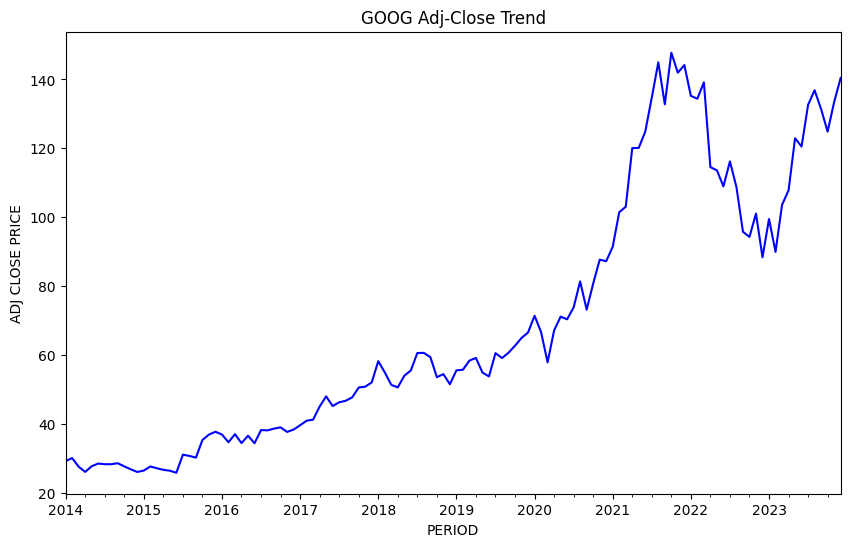

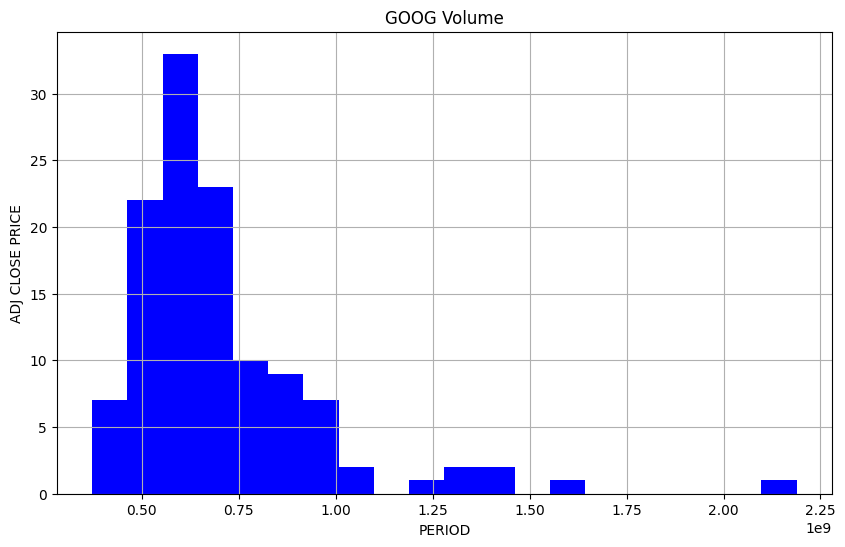

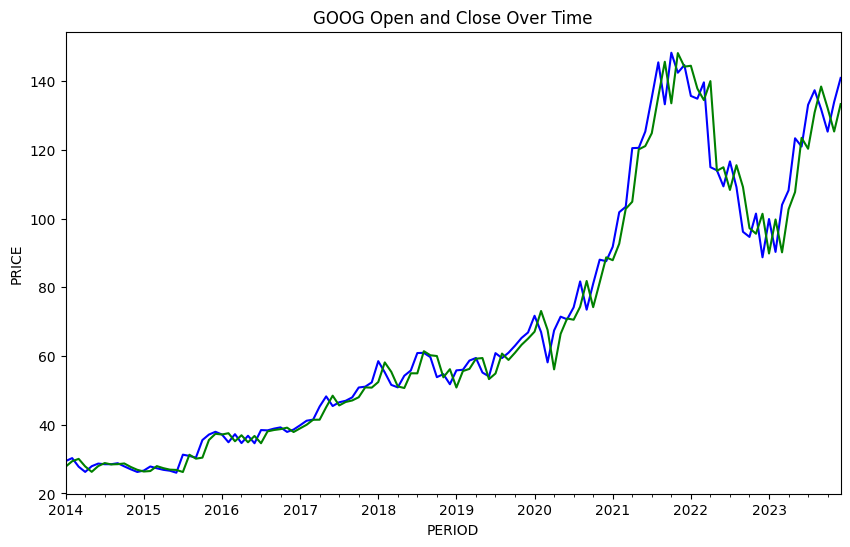

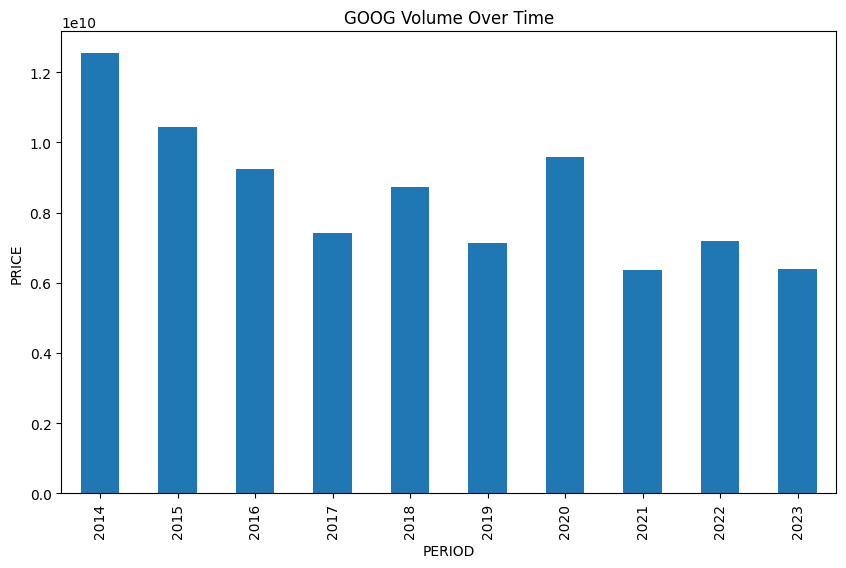

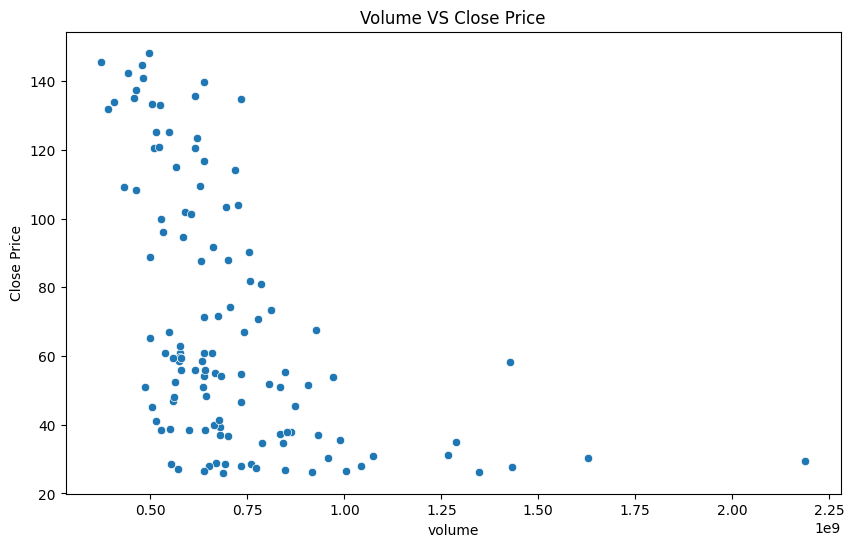

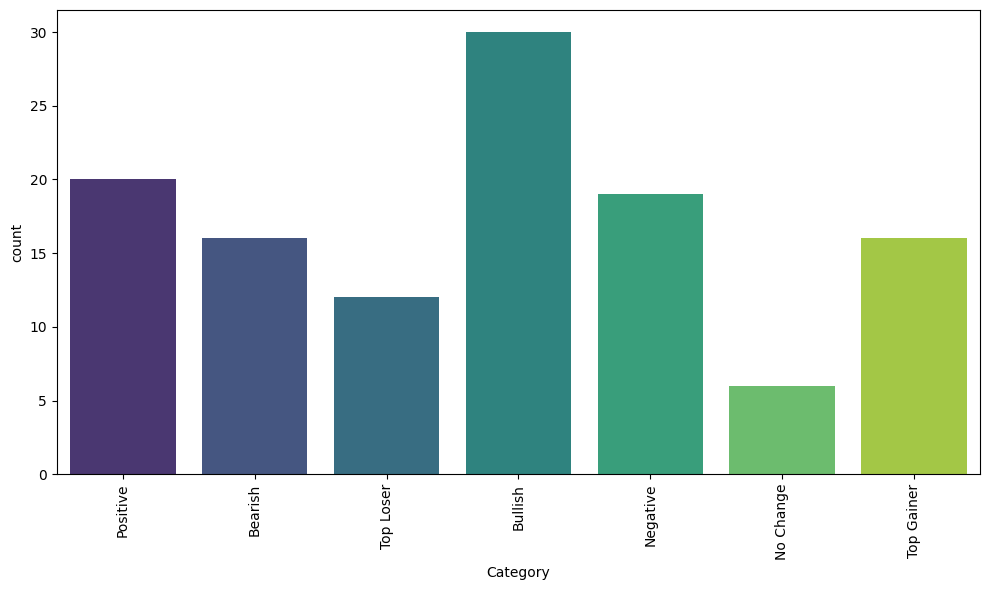

NameError: name 'df_monthly' is not defined

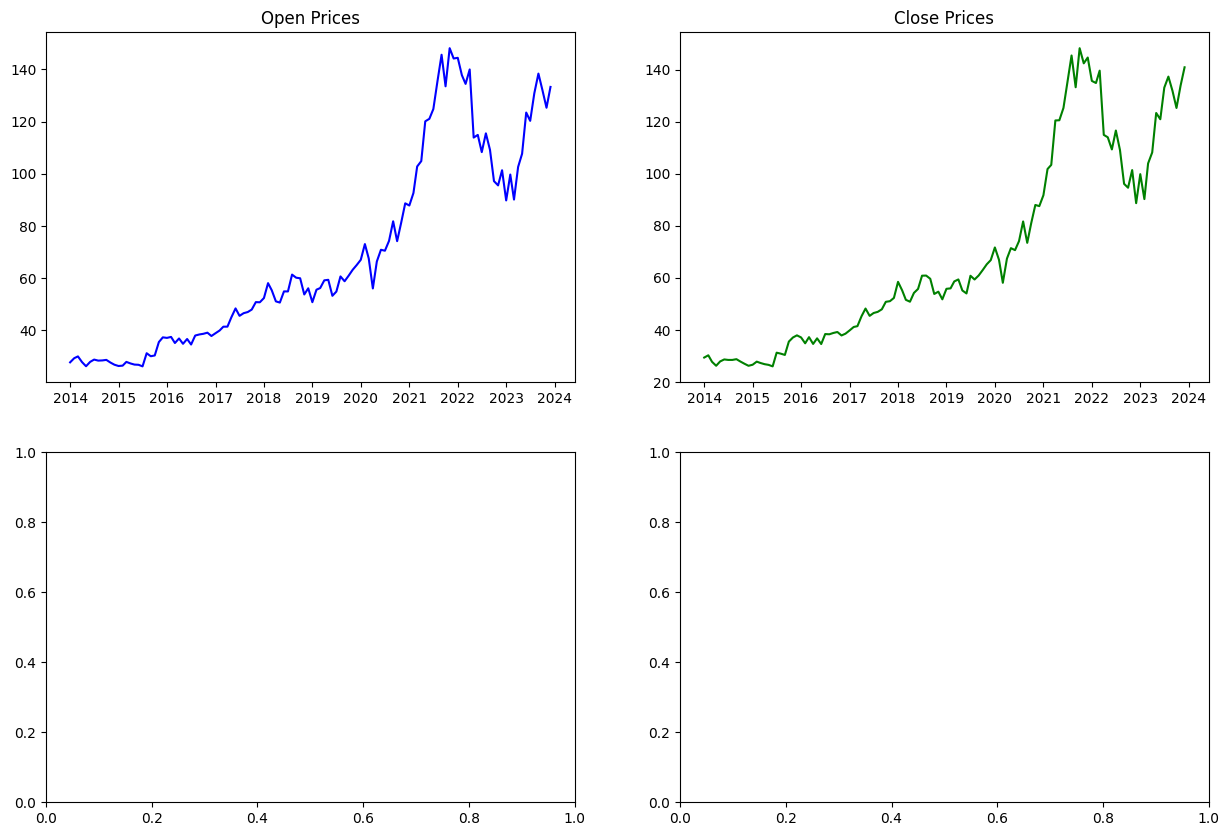

In [25]:
#Get ADJ Close Data
GOOG_adj_close = adj_close['GOOG']

#Find the Percentage Change Between Previous Data and Current Data
GOOG_adj_close['daily_perc_change'] = GOOG_adj_close.pct_change()*100 
GOOG_adj_close['daily_perc_change'].dropna(axis=0,inplace=True)

GOOG_adj_close['daily_perc_change'] = pd.to_numeric(GOOG_adj_close['daily_perc_change'], errors='coerce')
GOOG_adj_close['daily_perc_change'] = GOOG_adj_close['daily_perc_change'].fillna(0) 

#Set Data One by One from Categories
GOOG_adj_clos = df_stocks['Adj Close','GOOG']
GOOG_open = df_stocks['Open','GOOG']
GOOG_close = df_stocks['Close','GOOG']
GOOG_high = df_stocks['High','GOOG']
GOOG_low = df_stocks['Low','GOOG']
GOOG_volume = df_stocks['Volume','GOOG']
GOOG_percentage = GOOG_adj_close['daily_perc_change']

#Create New DataFrame and Paste the Data
df_GOOG = pd.DataFrame()
df_GOOG ['adj_close'] = GOOG_adj_close
df_GOOG ['open'] = GOOG_open
df_GOOG ['close'] = GOOG_close
df_GOOG ['high'] = GOOG_high
df_GOOG ['low'] = GOOG_low
df_GOOG ['volume'] = GOOG_volume
df_GOOG ['daily_perc_change'] = GOOG_percentage

#Drop Unnecessary Data
df_GOOG = df_GOOG.drop(df_GOOG.index[-1])
df_GOOG

#Create Year-Wise Data for Analysis
df_GOOG.index = pd.to_datetime(df_GOOG.index)
df_year = df_GOOG.resample("Y").sum()
df_year.index = df_year.index.strftime("%Y")  



# Ensure to apply 'daily_perc_change'
GOOG_adj_close['Change Type'] = GOOG_adj_close['daily_perc_change'].apply(categorize_data)

GOOG_categarize = GOOG_adj_close['Change Type'] 
df_GOOG['categarize'] = GOOG_categarize
df_GOOG

#Create a line plot to visualize the trend of the adjusted closing price.
plt.figure(figsize=(10,6))
df_GOOG['adj_close'].plot(color='blue')
plt.title('GOOG Adj-Close Trend')
plt.ylabel('ADJ CLOSE PRICE')
plt.xlabel('PERIOD')

#Create a histogram to visualize the volume density over the period.
plt.figure(figsize=(10,6))
df_GOOG['volume'].hist(bins=20,color='blue')
plt.title('GOOG Volume')
plt.ylabel('ADJ CLOSE PRICE')
plt.xlabel('PERIOD')

#Create a line plot to visualize the trend of the opening and closing prices.
plt.figure(figsize=(10,6))
df_GOOG['close'].plot(color='blue')
df_GOOG['open'].plot(color='green')
plt.title('GOOG Open and Close Over Time')
plt.ylabel('PRICE')
plt.xlabel('PERIOD')

#Create a bar plot to visualize the trading volume.
plt.figure(figsize=(10,6))
df_year['volume'].plot(kind="bar", legend=False)
plt.title('GOOG Volume Over Time')
plt.ylabel('PRICE')
plt.xlabel('PERIOD')

#Create a scatter plot to compare the opening and closing prices
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_GOOG['volume'],y=df_GOOG['close'], palette='coolwarm')
plt.title('Volume VS Close Price')
plt.ylabel('Close Price')

#Create a counter plot to analyze trading terms, such as the top gainers and top losers
plt.figure(figsize=(10, 6))
sns.countplot(x='categarize', data=df_GOOG, palette='viridis')
plt.xlabel('Category')
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

#Create Dashboard to Understand Basic Data
# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Line plot of 'open' prices
axs[0, 0].plot(df_GOOG.index, df_GOOG['open'], color='blue')
axs[0, 0].set_title('Open Prices')

# Plot 2: Line plot of 'close' prices
axs[0, 1].plot(df_GOOG.index, df_GOOG['close'], color='green')
axs[0, 1].set_title('Close Prices')

# Plot 3: Bar plot of 'volume'
axs[1, 0].bar(df_monthly.index, df_monthly['volume'], color='purple')
axs[1, 0].set_title('Volume')

# Plot 4: Candlestick plot (requires mplfinance)
import mplfinance as mpf
ohlc = df_GOOG[['open', 'high', 'low', 'close']].copy()
mpf.plot(ohlc, type='candle', ax=axs[1, 1], style='charles')
axs[1, 1].set_title('Candlestick Chart')

# Adjust layout
plt.tight_layout()
plt.show()


In [26]:
df_GOOG

,adj_close,open,close,high,low,volume,daily_perc_change,categarize
Date,,,,,,,,
2014-01-01 00:00:00+00:00,29.308689,27.782366,29.414000,29.552729,26.955713,2.188641e+09,NaN,NaN
2014-02-01 00:00:00+00:00,30.169359,29.369913,30.277761,30.607277,28.095192,1.627931e+09,2.936570,Positive
2014-03-01 00:00:00+00:00,27.672819,30.056091,27.772251,30.560204,27.570307,1.431962e+09,-8.275085,Bearish
2014-04-01 00:00:00+00:00,26.166882,27.859013,26.260900,30.158699,25.071167,1.347112e+09,-5.441938,Top Loser
2014-05-01 00:00:00+00:00,27.817902,26.283339,27.917852,28.314262,25.096100,7.325597e+08,6.309579,Bullish
...,...,...,...,...,...,...,...,...
2023-08-01 00:00:00+00:00,136.858261,130.854996,137.350006,138.399994,127.000000,4.634820e+08,3.185338,Top Gainer
2023-09-01 00:00:00+00:00,131.377945,138.429993,131.850006,139.929993,128.190002,3.895939e+08,-4.004374,Top Loser
2023-10-01 00:00:00+00:00,124.851402,132.154999,125.300003,142.380005,121.459999,5.148771e+08,-4.967761,Top Loser


## MICROSOFT(MSFT) Stock Market Analysis

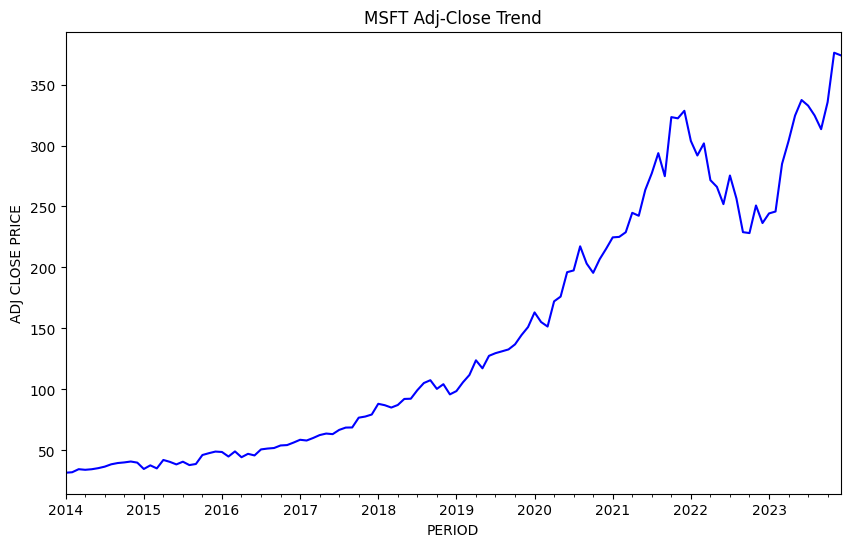

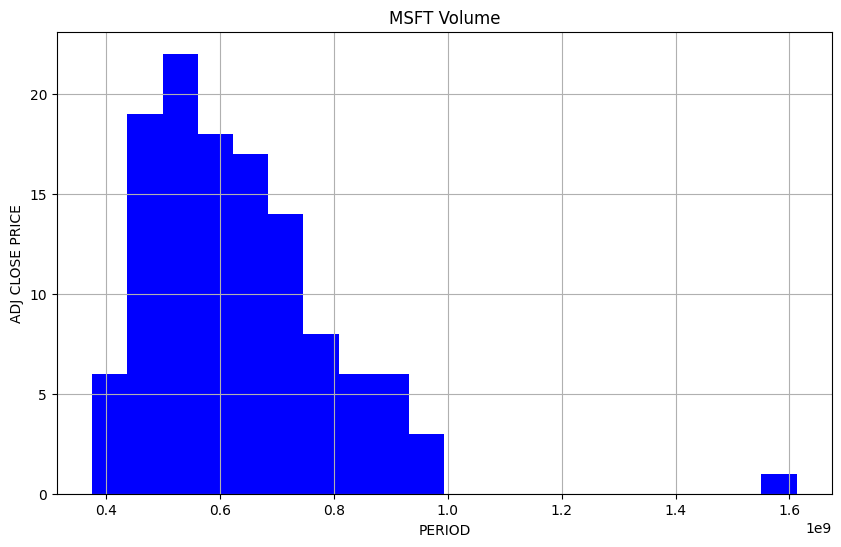

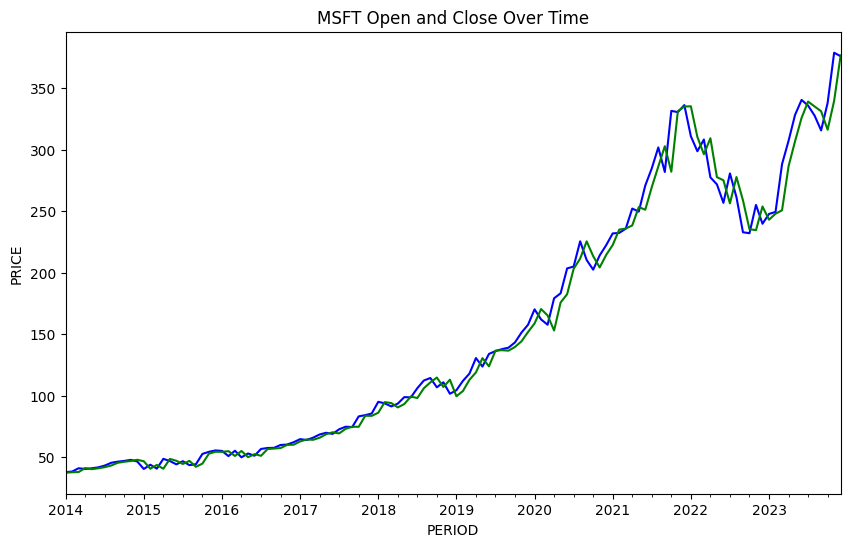

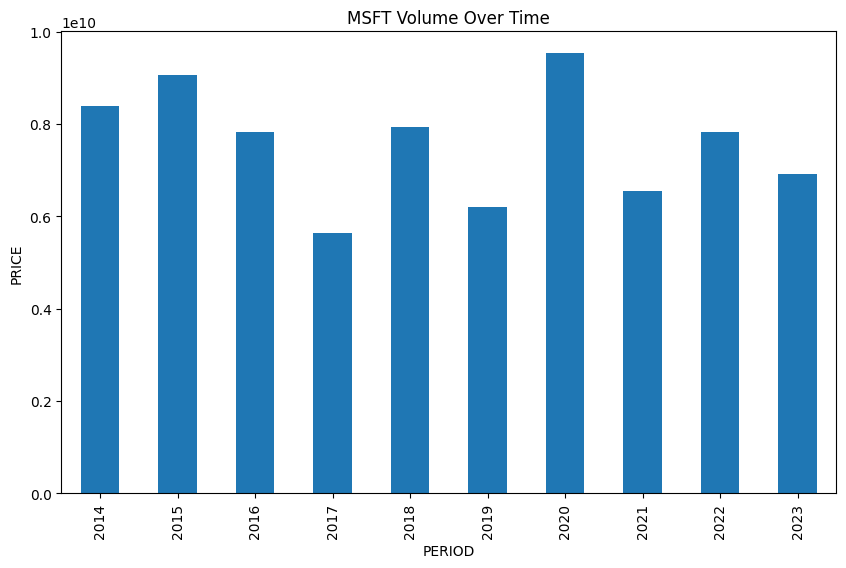

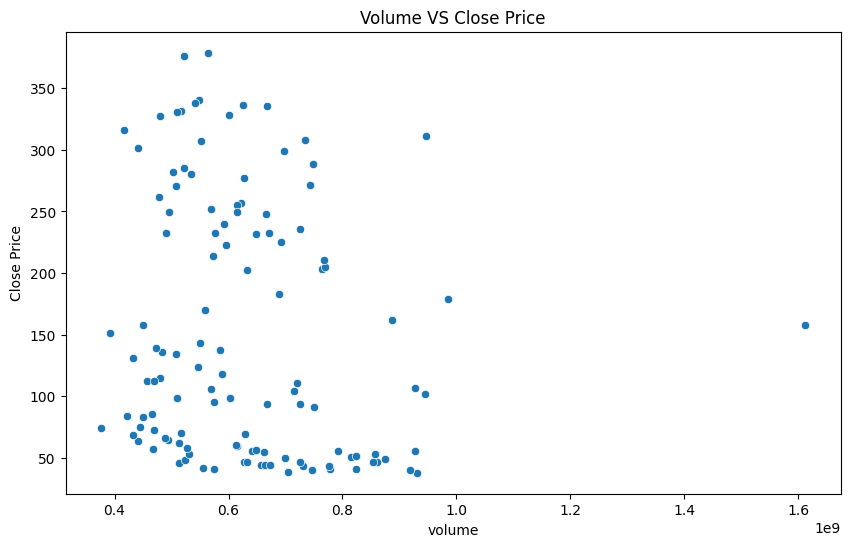

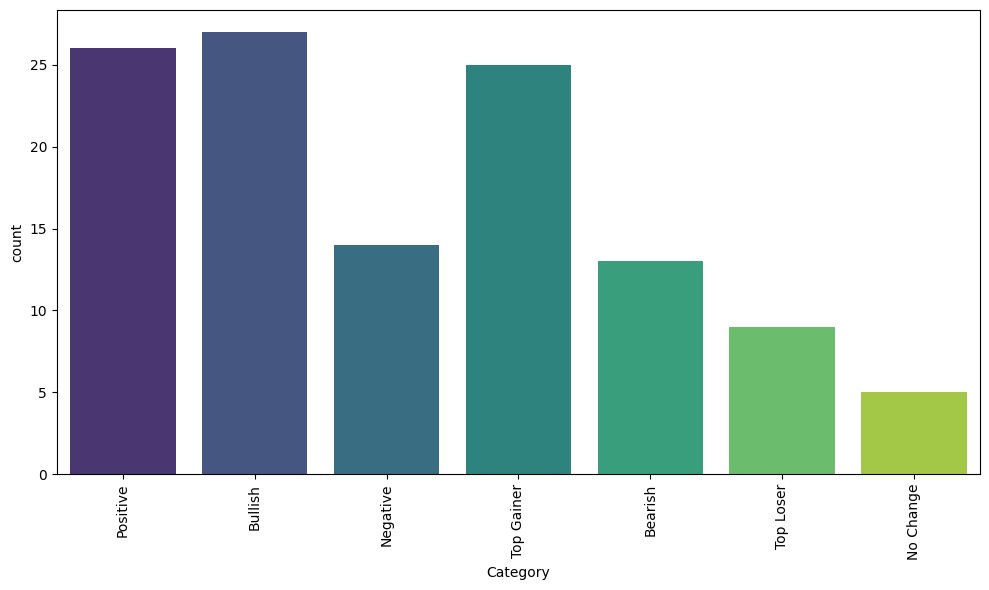

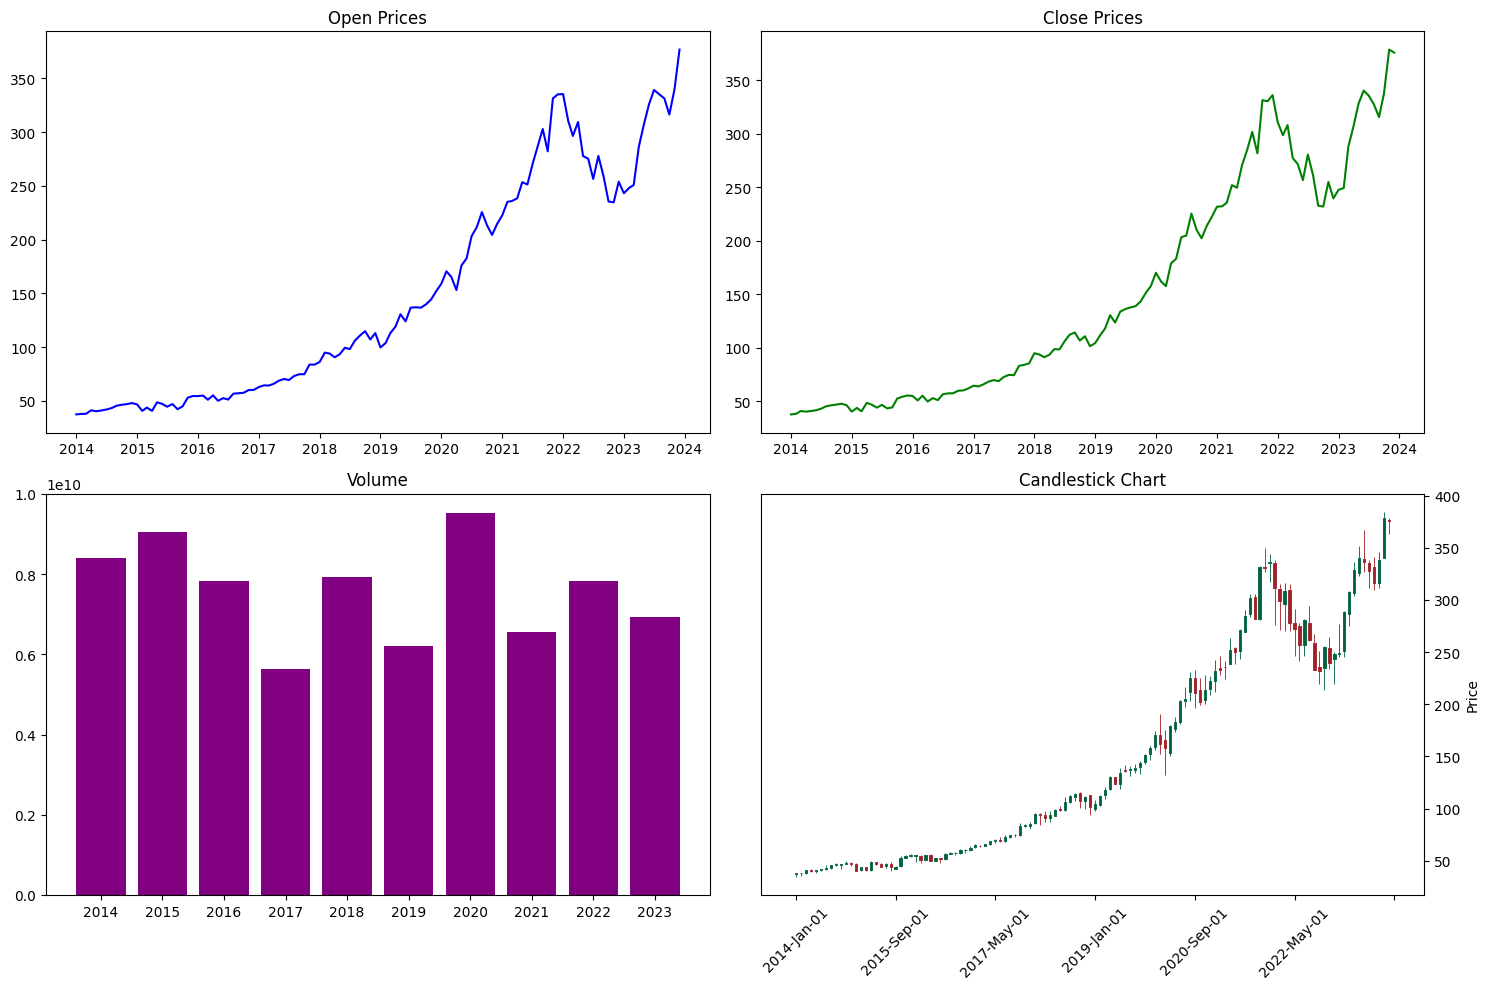

In [27]:
#Get ADJ Close Data
MSFT_adj_close = adj_close['MSFT']

#Find the Percentage Change Between Previous Data and Current Data
MSFT_adj_close['daily_perc_change'] = MSFT_adj_close.pct_change()*100 
MSFT_adj_close['daily_perc_change'].dropna(axis=0,inplace=True)

MSFT_adj_close['daily_perc_change'] = pd.to_numeric(MSFT_adj_close['daily_perc_change'], errors='coerce')
MSFT_adj_close['daily_perc_change'] = MSFT_adj_close['daily_perc_change'].fillna(0) 

#Set Data One by One from Categories
MSFT_adj_clos = df_stocks['Adj Close','MSFT']
MSFT_open = df_stocks['Open','MSFT']
MSFT_close = df_stocks['Close','MSFT']
MSFT_high = df_stocks['High','MSFT']
MSFT_low = df_stocks['Low','MSFT']
MSFT_volume = df_stocks['Volume','MSFT']
MSFT_percentage = MSFT_adj_close['daily_perc_change']

#Create New DataFrame and Paste the Data
df_MSFT = pd.DataFrame()
df_MSFT ['adj_close'] = MSFT_adj_close
df_MSFT ['open'] = MSFT_open
df_MSFT ['close'] = MSFT_close
df_MSFT ['high'] = MSFT_high
df_MSFT ['low'] = MSFT_low
df_MSFT ['volume'] = MSFT_volume
df_MSFT ['daily_perc_change'] = MSFT_percentage

#Drop Unnecessary Data
df_MSFT = df_MSFT.drop(df_MSFT.index[-1])
df_MSFT

#Create Year-Wise Data for Analysis
df_MSFT.index = pd.to_datetime(df_MSFT.index)
df_year = df_MSFT.resample("Y").sum()
df_year.index = df_year.index.strftime("%Y")  


# Ensure to apply 'daily_perc_change'
MSFT_adj_close['Change Type'] = MSFT_adj_close['daily_perc_change'].apply(categorize_data)

MSFT_categarize = MSFT_adj_close['Change Type'] 
df_MSFT['categarize'] = MSFT_categarize
df_MSFT

#Create a line plot to visualize the trend of the adjusted closing price.
plt.figure(figsize=(10,6))
df_MSFT['adj_close'].plot(color='blue')
plt.title('MSFT Adj-Close Trend')
plt.ylabel('ADJ CLOSE PRICE')
plt.xlabel('PERIOD')

#Create a histogram to visualize the volume density over the period.
plt.figure(figsize=(10,6))
df_MSFT['volume'].hist(bins=20,color='blue')
plt.title('MSFT Volume')
plt.ylabel('ADJ CLOSE PRICE')
plt.xlabel('PERIOD')

#Create a line plot to visualize the trend of the opening and closing prices.
plt.figure(figsize=(10,6))
df_MSFT['close'].plot(color='blue')
df_MSFT['open'].plot(color='green')
plt.title('MSFT Open and Close Over Time')
plt.ylabel('PRICE')
plt.xlabel('PERIOD')

#Create a bar plot to visualize the trading volume.
plt.figure(figsize=(10,6))
df_year['volume'].plot(kind="bar", legend=False)
plt.title('MSFT Volume Over Time')
plt.ylabel('PRICE')
plt.xlabel('PERIOD')

#Create a scatter plot to compare the opening and closing prices
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_MSFT['volume'],y=df_MSFT['close'], palette='coolwarm')
plt.title('Volume VS Close Price')
plt.ylabel('Close Price')

#Create a counter plot to analyze trading terms, such as the top gainers and top losers
plt.figure(figsize=(10, 6))
sns.countplot(x='categarize', data=df_MSFT, palette='viridis')
plt.xlabel('Category')
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

#Create Dashboard to Understand Basic Data
# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Line plot of 'open' prices
axs[0, 0].plot(df_MSFT.index, df_MSFT['open'], color='blue')
axs[0, 0].set_title('Open Prices')

# Plot 2: Line plot of 'close' prices
axs[0, 1].plot(df_MSFT.index, df_MSFT['close'], color='green')
axs[0, 1].set_title('Close Prices')

# Plot 3: Bar plot of 'volume'
axs[1, 0].bar(df_year.index, df_year['volume'], color='purple')
axs[1, 0].set_title('Volume')

# Plot 4: Candlestick plot (requires mplfinance)
import mplfinance as mpf
ohlc = df_MSFT[['open', 'high', 'low', 'close']].copy()
mpf.plot(ohlc, type='candle', ax=axs[1, 1], style='charles')
axs[1, 1].set_title('Candlestick Chart')

# Adjust layout
plt.tight_layout()
plt.show()


In [28]:
df_MSFT

,adj_close,open,close,high,low,volume,daily_perc_change,categarize
Date,,,,,,,,
2014-01-01 00:00:00+00:00,31.69021,37.349998,37.840000,37.889999,34.630001,930226200.0,NaN,NaN
2014-02-01 00:00:00+00:00,32.083839,37.740002,38.310001,38.459999,35.689999,705304500.0,1.242116,Positive
2014-03-01 00:00:00+00:00,34.585693,37.919998,40.990002,41.500000,37.490002,778425700.0,7.797863,Bullish
2014-04-01 00:00:00+00:00,34.087894,41.150002,40.400002,41.660000,38.900002,746112500.0,-1.439320,Negative
2014-05-01 00:00:00+00:00,34.543499,40.240002,40.939999,40.970001,38.509998,574362900.0,1.336558,Positive
...,...,...,...,...,...,...,...,...
2023-08-01 00:00:00+00:00,324.630829,335.190002,327.760010,338.540009,311.549988,479456700.0,-2.429149,Negative
2023-09-01 00:00:00+00:00,313.397583,331.309998,315.750000,340.859985,309.450012,416680700.0,-3.460314,Top Loser
2023-10-01 00:00:00+00:00,335.591034,316.279999,338.109985,346.200012,311.209991,540907000.0,7.081564,Bullish


## Market Capitalization of Top Tech Companies

<function matplotlib.pyplot.show(close=None, block=None)>

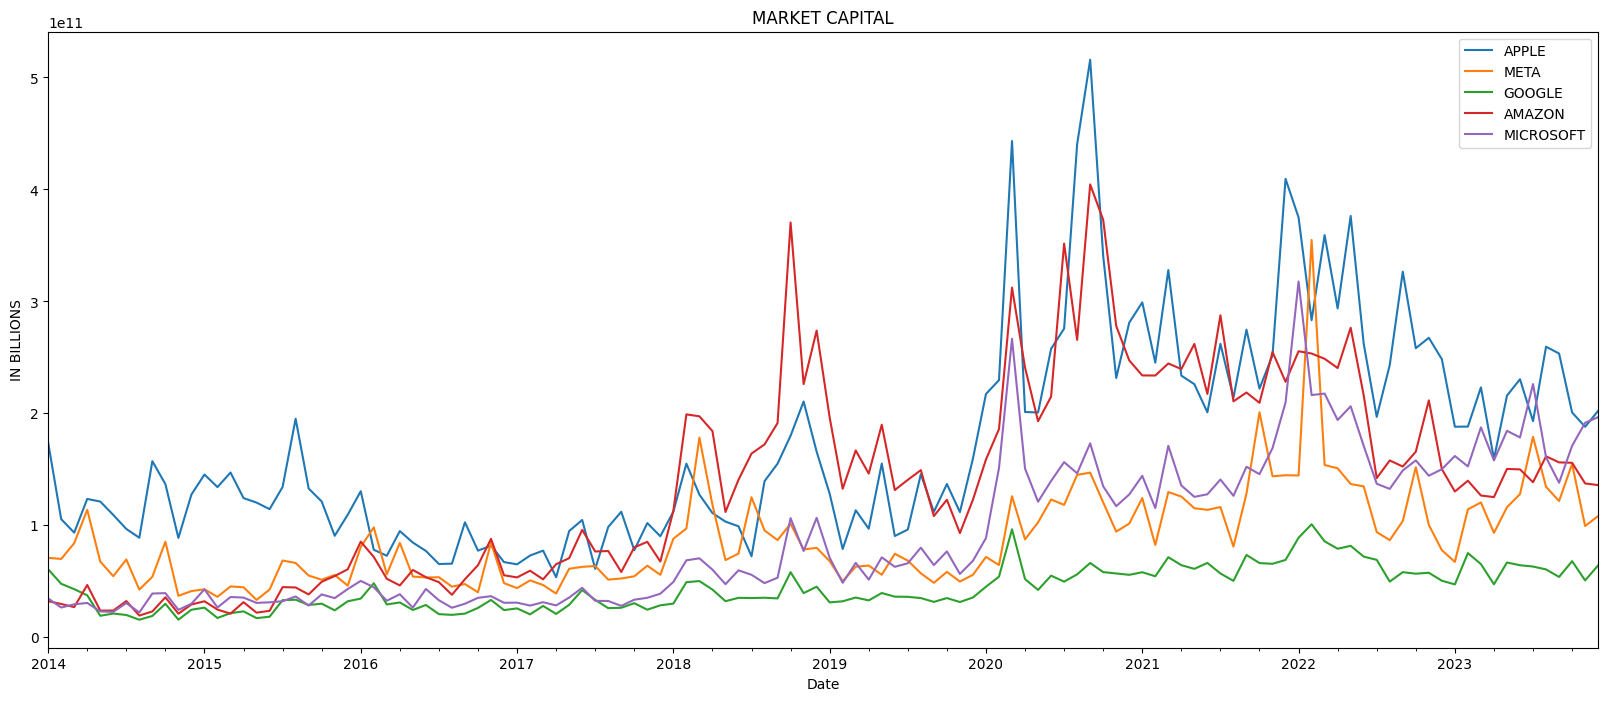

In [29]:
#Analysis Using Open-Volume Gathered Data
open_volume = df_stocks[['Open', 'Volume']]
open_volume.head()

#Creating a New DataFrame and Setting Data from Gathered Data
mark_cap = pd.DataFrame()

mark_cap['AAPL_mark'] = open_volume['Open', 'AAPL'] * open_volume['Volume', 'AAPL']
mark_cap['AMZN_mark'] = open_volume['Open', 'AMZN'] * open_volume['Volume', 'AMZN']
mark_cap['GOOG_mark'] = open_volume['Open', 'GOOG'] * open_volume['Volume', 'GOOG']
mark_cap['META_mark'] = open_volume['Open', 'META'] * open_volume['Volume', 'META']
mark_cap['MSFT_mark'] = open_volume['Open', 'MSFT'] * open_volume['Volume', 'MSFT']

#Plot the Line Graph to Show the Trend of All Companies' Market Capitalization
plt.figure(figsize =(20,8))
mark_cap['AAPL_mark'].plot(label='APPLE')
mark_cap['META_mark'].plot(label='META')
mark_cap['GOOG_mark'].plot(label='GOOGLE')
mark_cap['AMZN_mark'].plot(label='AMAZON')
mark_cap['MSFT_mark'].plot(label='MICROSOFT')

plt.title('MARKET CAPITAL')
plt.ylabel('IN BILLIONS')
plt.legend()
plt.show

In [30]:
mark_cap

,AAPL_mark,AMZN_mark,GOOG_mark,META_mark,MSFT_mark
Date,,,,,
2014-01-01 00:00:00+00:00,1.739666e+11,3.230755e+10,6.080562e+10,7.098921e+10,3.474395e+10
2014-02-01 00:00:00+00:00,1.055547e+11,2.979857e+10,4.781219e+10,7.001209e+10,2.661819e+10
2014-03-01 00:00:00+00:00,9.349961e+10,2.699644e+10,4.303918e+10,8.406426e+10,2.951790e+10
2014-04-01 00:00:00+00:00,1.235899e+11,4.675064e+10,3.752922e+10,1.139045e+11,3.070253e+10
2014-05-01 00:00:00+00:00,1.212684e+11,2.389829e+10,1.925412e+10,6.769100e+10,2.311236e+10
...,...,...,...,...,...
2023-08-01 00:00:00+00:00,2.595155e+11,1.616524e+11,6.064894e+10,1.343664e+11,1.607091e+11
2023-09-01 00:00:00+00:00,2.534593e+11,1.562331e+11,5.393148e+10,1.217498e+11,1.380505e+11
2023-10-01 00:00:00+00:00,2.007931e+11,1.558626e+11,6.804358e+10,1.547933e+11,1.710781e+11


In [31]:
melt = pd.melt(adj_close)

In [32]:
melt

,Ticker,value
0,AAPL,15.597579
1,AAPL,16.396463
2,AAPL,16.823723
3,AAPL,18.495949
4,AAPL,19.840929
...,...,...
595,MSFT,324.630829
596,MSFT,313.397583
597,MSFT,335.591034
598,MSFT,376.087067


In [ ]:
grid = sns.FacetGrid(melt, col= 'value' ,sharex=False, sharey=False, col_wrap=3)

grid.map(sns.distplot, 'value', color='green')
plt.show()